**Import**

In [ ]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# Creat My Own .csv File

In [ ]:
'for First time only'
'''import pandas as pd

# Define empty DataFrame with the required columns
df_init = pd.DataFrame(columns=['CellID', 'datetime', 'internet'])

# Path to the CSV file on Google Drive
output_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Save the empty DataFrame to CSV (creates file with headers only)
df_init.to_csv(output_path, index=False)
'''

# Load Data

Active the Drive to load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''file_path = "/content/drive/MyDrive/data_folder/Copy of week_7.csv"

#df = pd.read_csv(file_path, on_bad_lines='skip')


# Define the correct column names based on your data structure
col_names = ['CellID', 'datetime', 'countrycode', 'smsin', 'smsout', 'callin', 'callout', 'internet']
# Read CSV without header and assign column names
df = pd.read_csv(file_path, header=None, names=col_names, on_bad_lines='skip')

df.head()'''

'only for week 6,7,8'
import pandas as pd

file_path = "/content/drive/MyDrive/data_folder/Copy of week_9.csv"

use_cols = ['CellID', 'countrycode', 'datetime', 'internet']  # columns to load

chunks = []
chunk_size = 100000  # adjust as needed

for chunk in pd.read_csv(
    file_path,
    usecols=use_cols,
    chunksize=chunk_size,
    on_bad_lines='skip',
    low_memory=False
):
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)



In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

print(df.head())
print(f"DataFrame shape: {df.shape}")

   CellID            datetime  countrycode   internet
0       1 2013-12-26 23:00:00            0        NaN
1       1 2013-12-26 23:00:00           39  10.251357
2       1 2013-12-26 23:00:00           49   0.027300
3       1 2013-12-26 23:10:00            0        NaN
4       1 2013-12-26 23:10:00           39  10.414706
DataFrame shape: (4547803, 4)


# Exploring the **Country Code** For further Analysis

In [ ]:
# 1. Count rows per unique countrycode
countrycode_counts = df['countrycode'].value_counts()
print(countrycode_counts)

countrycode
39       15839751
0        12475454
33        2770562
46        2556736
49        2146999
           ...   
7718            7
1441            6
12844           4
1924            4
7715            1
Name: count, Length: 326, dtype: int64


List all unique Ids

In [ ]:
unique_countrycodes = df['countrycode'].unique().tolist()
print(unique_countrycodes)

[0, 39, 33, 49, 46, 40, 420, 355, 7, 44, 359, 41, 32, 233, 20, 380, 370, 45, 48, 357, 212, 373, 34, 1, 86, 43, 82, 421, 47, 352, 852, 81, 90, 216, 91, 27, 94, 358, 53, 31, 30, 63, 62, 55, 221, 371, 213, 51, 92, 234, 88239, 593, 375, 387, 880, 356, 964, 353, 385, 389, 1514, 36, 1647, 971, 381, 226, 351, 18099, 98, 61, 218, 256, 503, 973, 54, 1829, 244, 972, 1809, 18096, 66, 974, 65, 58, 52, 690, 230, 18092, 261, 229, 56, 241, 223, 254, 60, 968, 255, 225, 228, 961, 386, 242, 220, 18098, 64, 224, 963, 93, 57, 243, 258, 372, 992, 507, 7778, 18093, 995, 966, 996, 886, 7701, 506, 960, 591, 382, 238, 260, 84, 18097, 237, 7775, 1587, 7727, 7705, 598, 965, 291, 976, 298, 1778, 504, 7717, 377, 245, 1579, 374, 239, 376, 7777, 232, 248, 262, 1780, 1758, 251, 235, 250, 853, 290, 595, 211, 994, 1849, 7702, 505, 7711, 97259, 1905, 1438, 8817, 1416, 596, 502, 975, 18094, 1604, 222, 18686, 354, 962, 856, 1403, 677, 297, 1808, 227, 590, 870, 7707, 1613, 1907, 1214, 1250, 1519, 240, 263, 1787, 998, 675, 

In [ ]:
print("Number of unique countrycodes:", df['countrycode'].nunique())

Number of unique countrycodes: 326


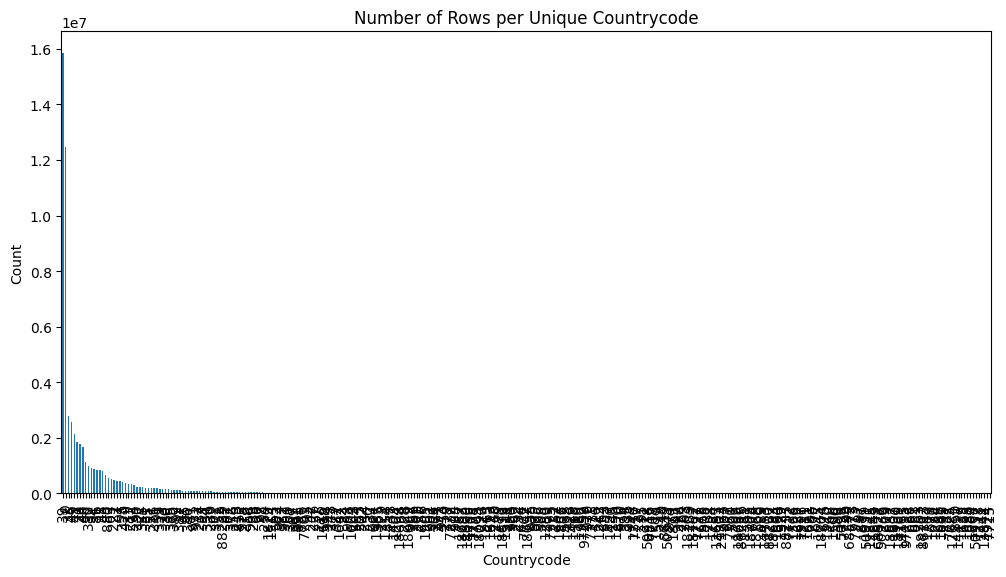

In [ ]:
# 2. Bar chart for counts of each countrycode
plt.figure(figsize=(12,6))
countrycode_counts.plot(kind='bar')
plt.title('Number of Rows per Unique Countrycode')
plt.xlabel('Countrycode')
plt.ylabel('Count')
plt.show()

<ipython-input-7-73f40ce45a7c>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


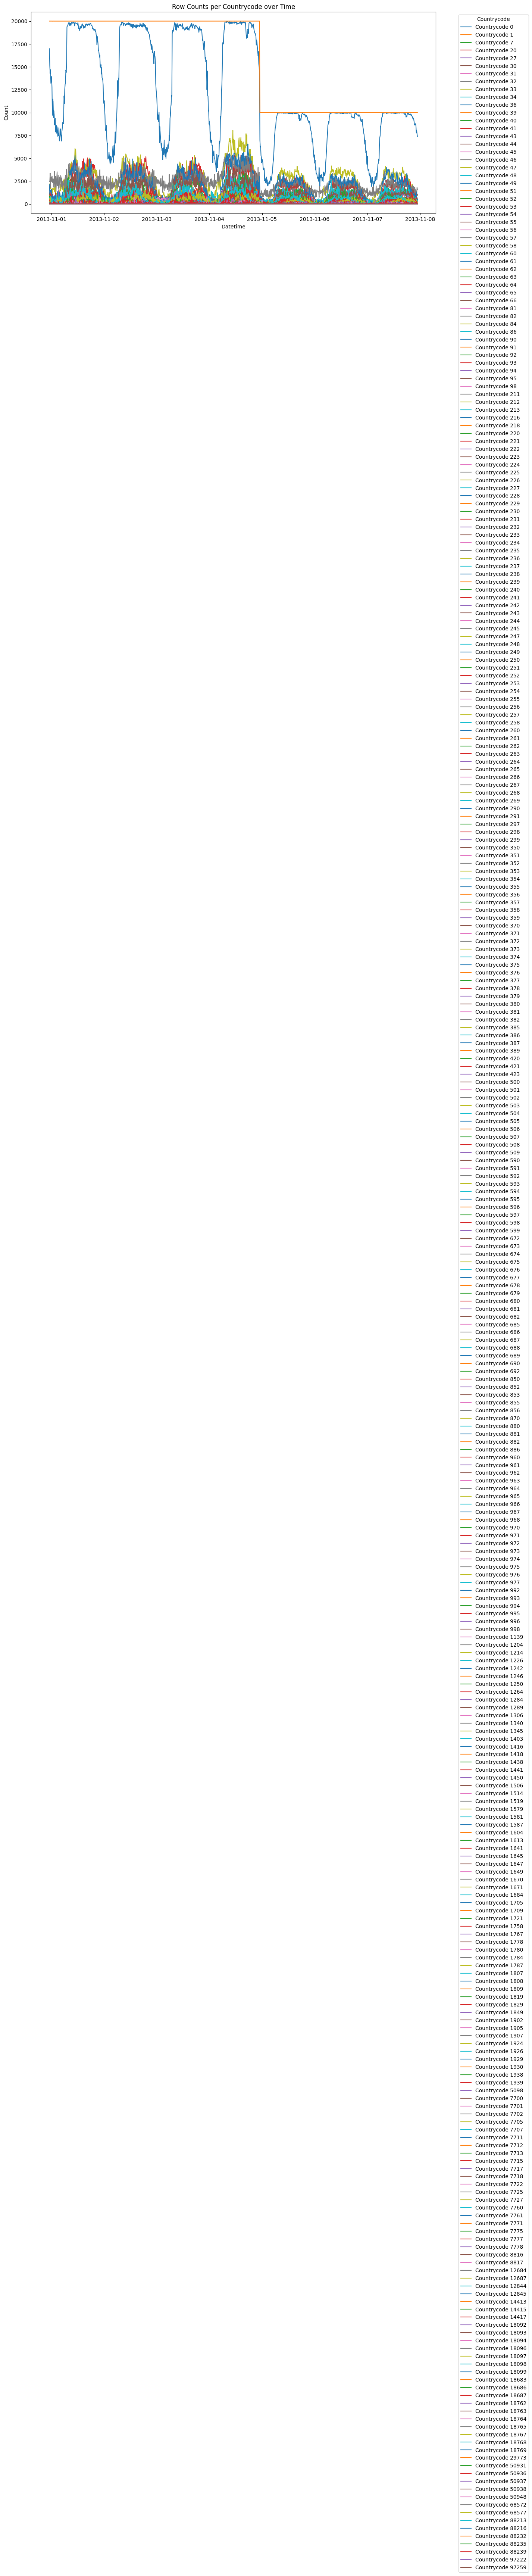

In [ ]:
# 3. Convert datetime (assuming it's in UNIX timestamp milliseconds) to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Group by datetime and countrycode and count rows
time_country_counts = df.groupby(['datetime', 'countrycode']).size().unstack(fill_value=0)

# Plot counts per countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_counts.columns:
    plt.plot(time_country_counts.index, time_country_counts[country], label=f'Countrycode {country}')
plt.title('Row Counts per Countrycode over Time')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

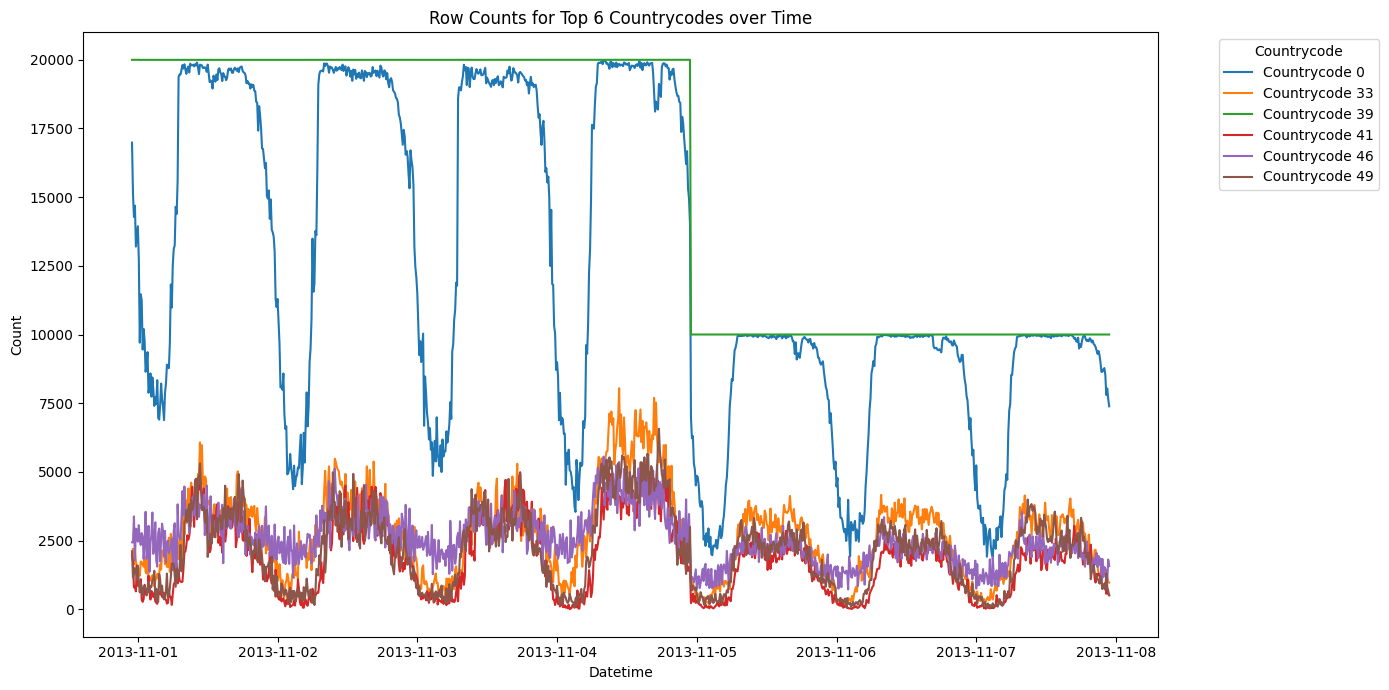

In [ ]:
# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Get top 6 countrycodes by total row count
top6_countrycodes = df['countrycode'].value_counts().nlargest(6).index

# Filter dataframe for only top 6 countrycodes
df_top6 = df[df['countrycode'].isin(top6_countrycodes)]

# Group by datetime and countrycode, count rows
time_country_counts_top6 = df_top6.groupby(['datetime', 'countrycode']).size().unstack(fill_value=0)

# Plot counts per top 6 countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_counts_top6.columns:
    plt.plot(time_country_counts_top6.index, time_country_counts_top6[country], label=f'Countrycode {country}')
plt.title('Row Counts for Top 6 Countrycodes over Time')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


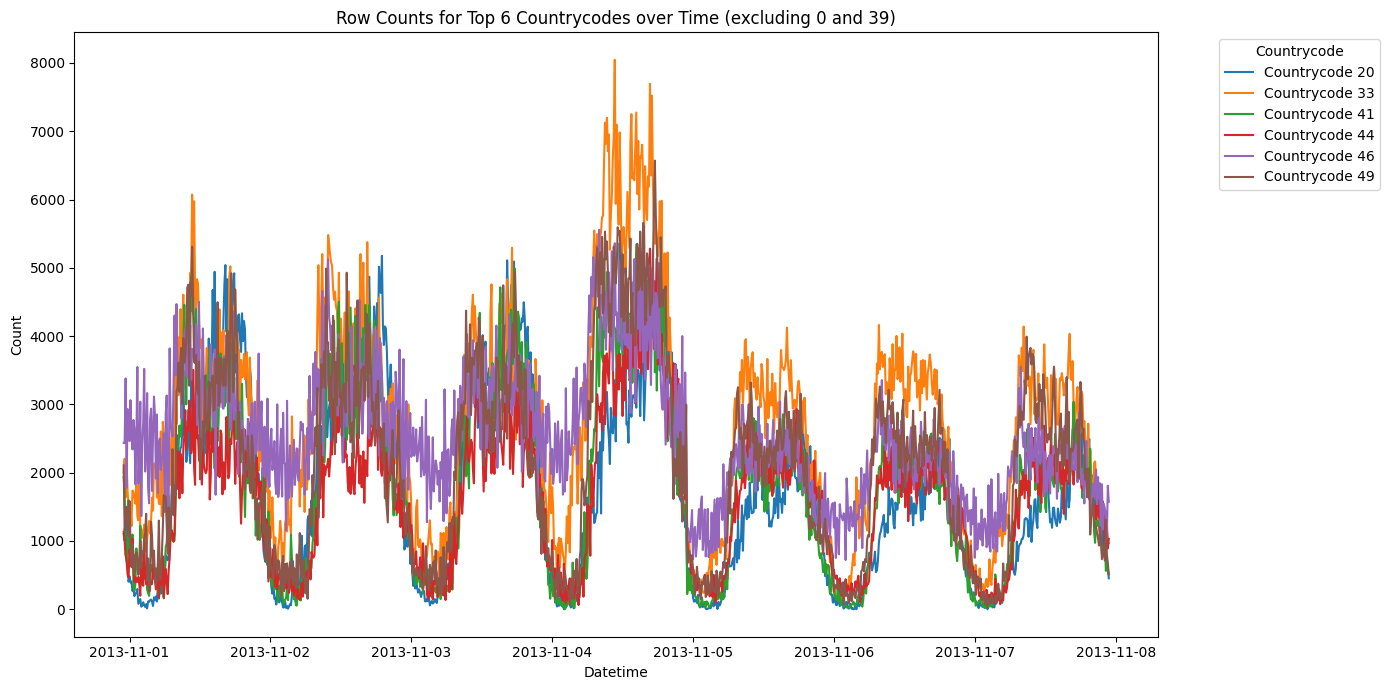

In [ ]:
# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Get top 6 countrycodes by total row count excluding 0 and 39
top6_countrycodes = df[~df['countrycode'].isin([0, 39])]['countrycode'].value_counts().nlargest(6).index

# Filter dataframe for only top 6 countrycodes (excluding 0 and 39)
df_top6 = df[df['countrycode'].isin(top6_countrycodes)]

# Group by datetime and countrycode, count rows
time_country_counts_top6 = df_top6.groupby(['datetime', 'countrycode']).size().unstack(fill_value=0)

# Plot counts per top 6 countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_counts_top6.columns:
    plt.plot(time_country_counts_top6.index, time_country_counts_top6[country], label=f'Countrycode {country}')
plt.title('Row Counts for Top 6 Countrycodes over Time (excluding 0 and 39)')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Countrycode with highest total rows > 600: 880 (Count: 554878)


<ipython-input-13-697cf457e1f7>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


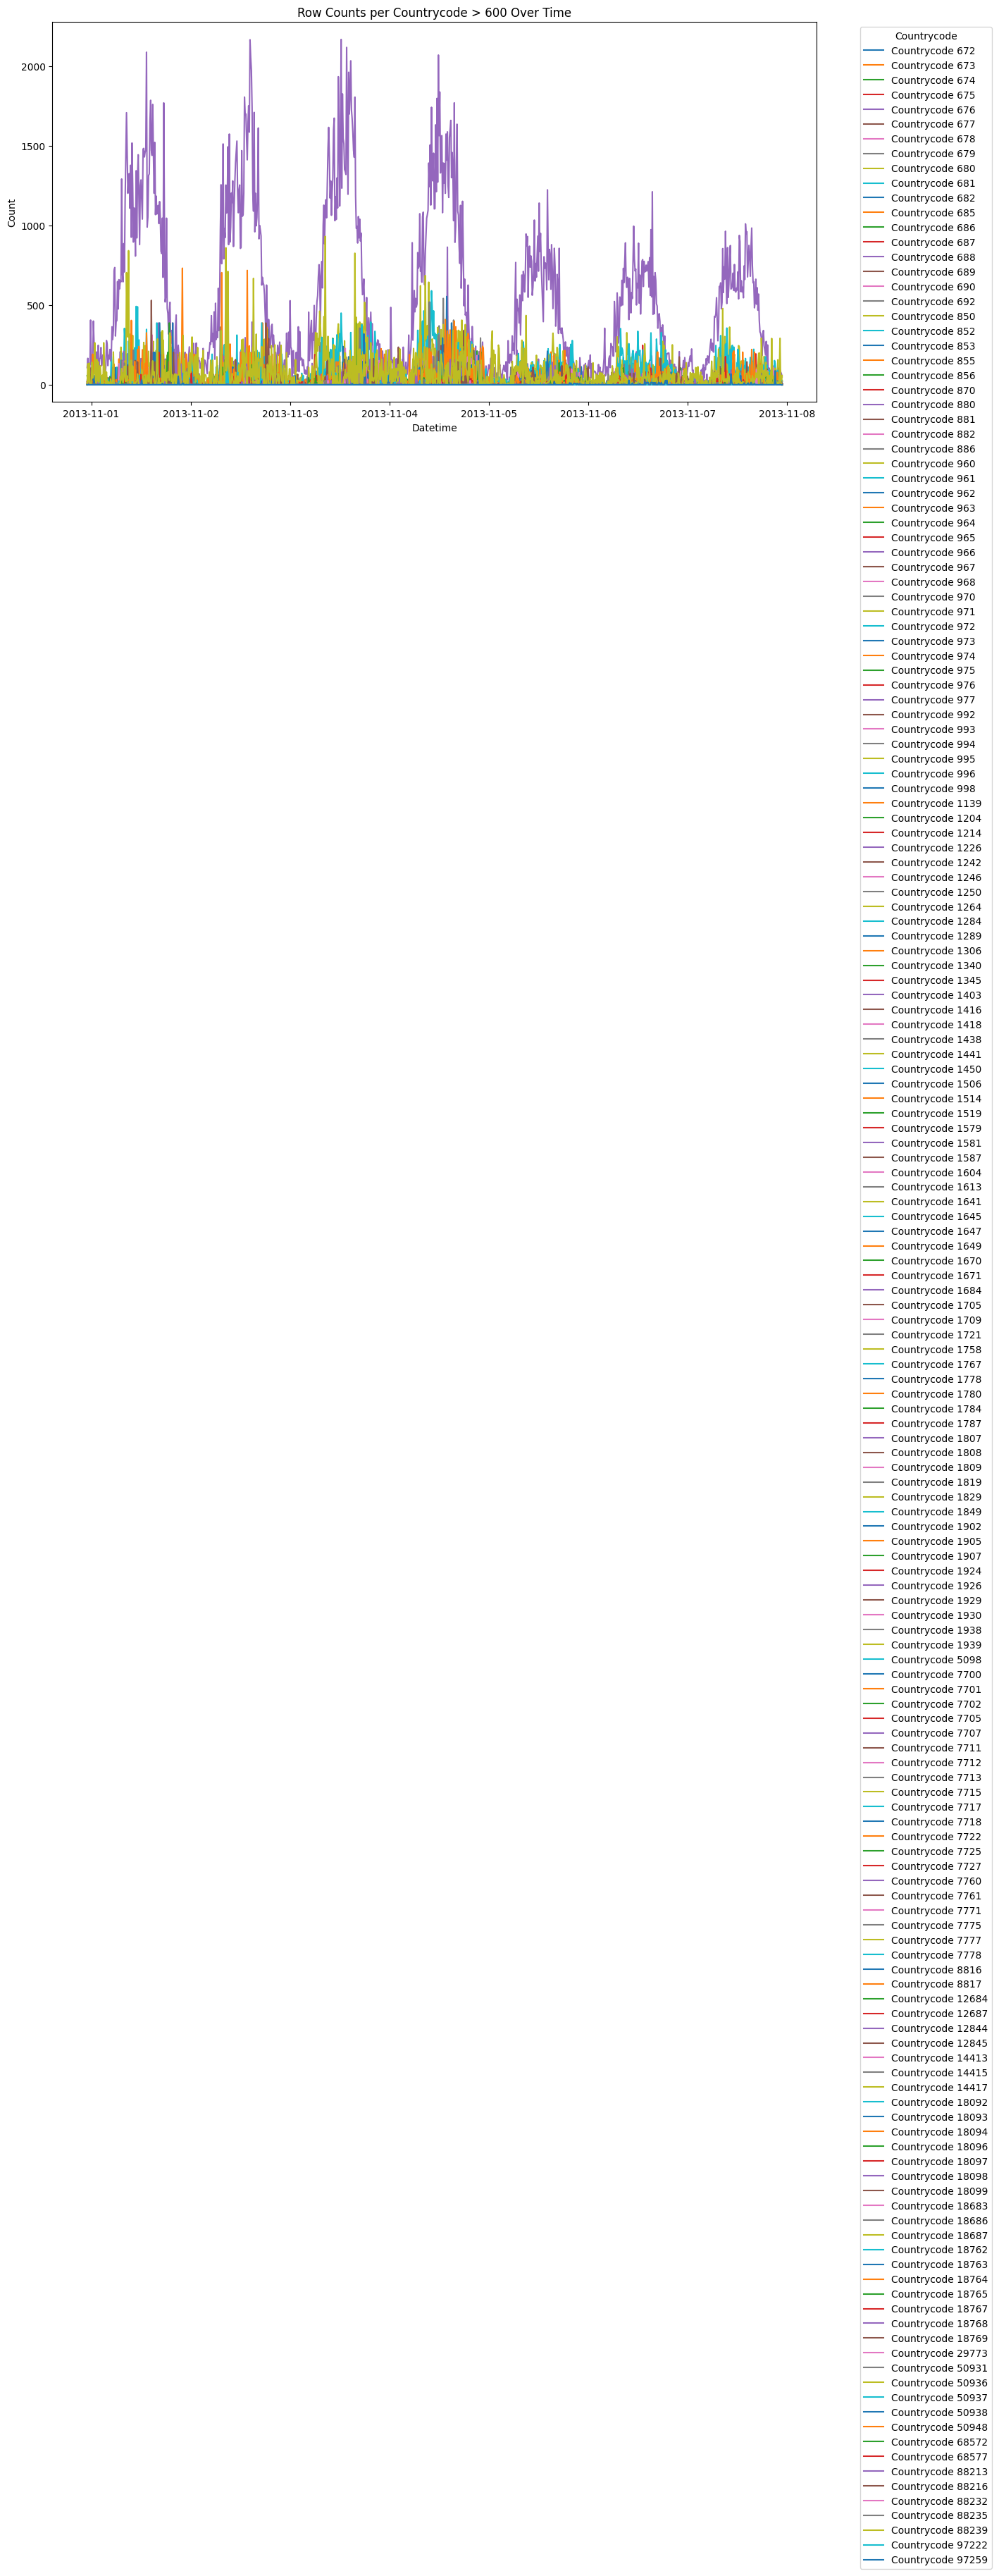

In [ ]:
# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Group by datetime and countrycode and count rows
time_country_counts = df.groupby(['datetime', 'countrycode']).size().unstack(fill_value=0)

# Filter columns to only country codes > 600
filtered_cols = [col for col in time_country_counts.columns if col > 600]
time_country_counts_filtered = time_country_counts[filtered_cols]

# Calculate total counts per countrycode and find the highest
total_counts = time_country_counts_filtered.sum()
highest_code = total_counts.idxmax()
highest_count = total_counts.max()

print(f"Countrycode with highest total rows > 600: {highest_code} (Count: {highest_count})")

# Plot counts per filtered countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_counts_filtered.columns:
    plt.plot(time_country_counts_filtered.index, time_country_counts_filtered[country], label=f'Countrycode {country}')
plt.title('Row Counts per Countrycode > 600 Over Time')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Countrycode with highest total rows > 600 excluding 880: 971 (Count: 79320)


<ipython-input-14-112438add0ec>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


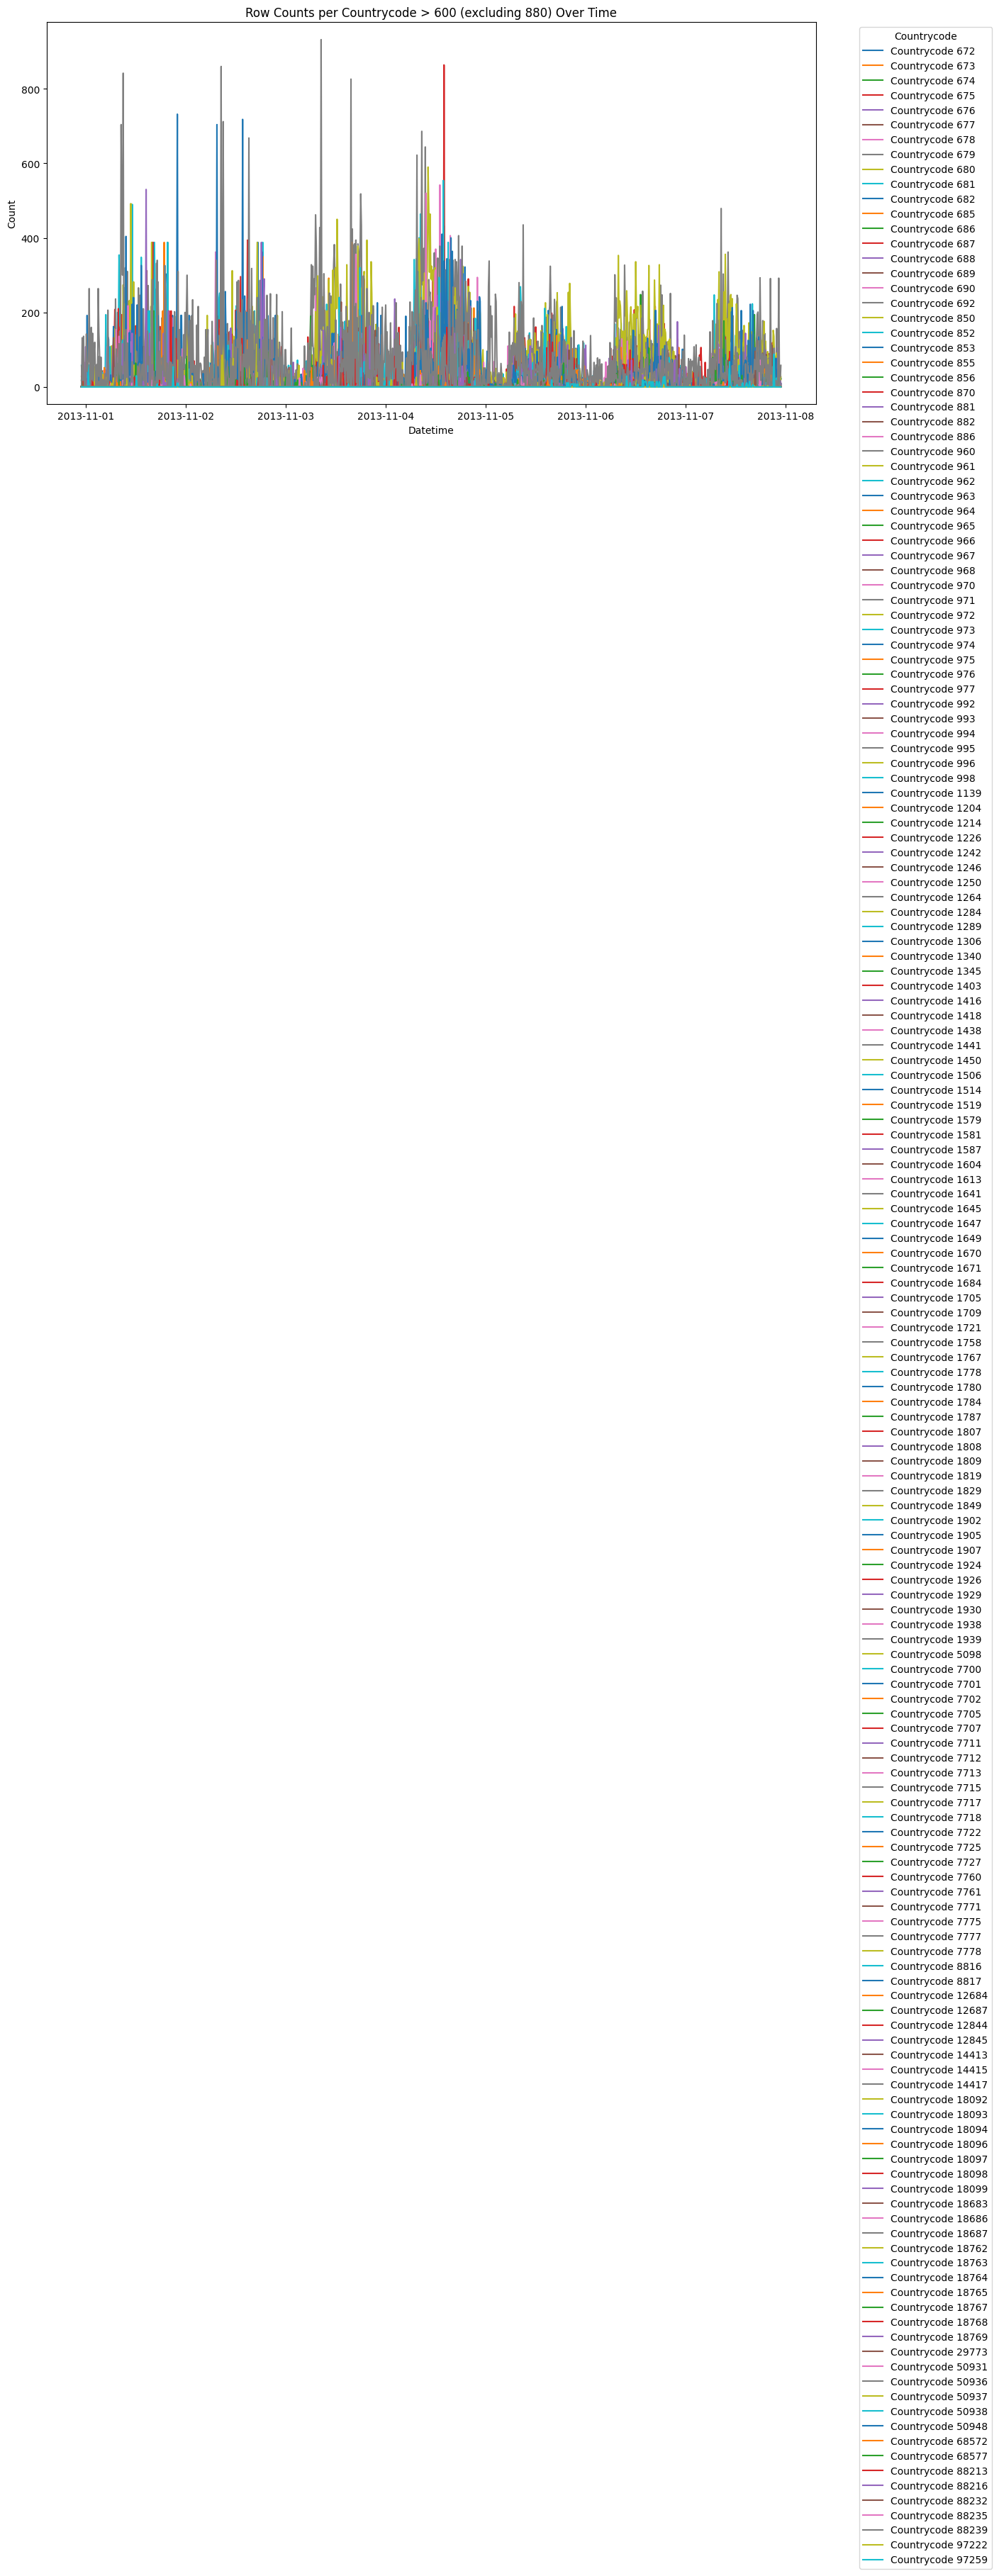

In [ ]:
# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Group by datetime and countrycode and count rows
time_country_counts = df.groupby(['datetime', 'countrycode']).size().unstack(fill_value=0)

# Filter columns to only country codes > 600 and exclude 880
filtered_cols = [col for col in time_country_counts.columns if col > 600 and col != 880]
time_country_counts_filtered = time_country_counts[filtered_cols]

# Calculate total counts per countrycode and find the highest
total_counts = time_country_counts_filtered.sum()
highest_code = total_counts.idxmax()
highest_count = total_counts.max()

print(f"Countrycode with highest total rows > 600 excluding 880: {highest_code} (Count: {highest_count})")

# Plot counts per filtered countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_counts_filtered.columns:
    plt.plot(time_country_counts_filtered.index, time_country_counts_filtered[country], label=f'Countrycode {country}')
plt.title('Row Counts per Countrycode > 600 (excluding 880) Over Time')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


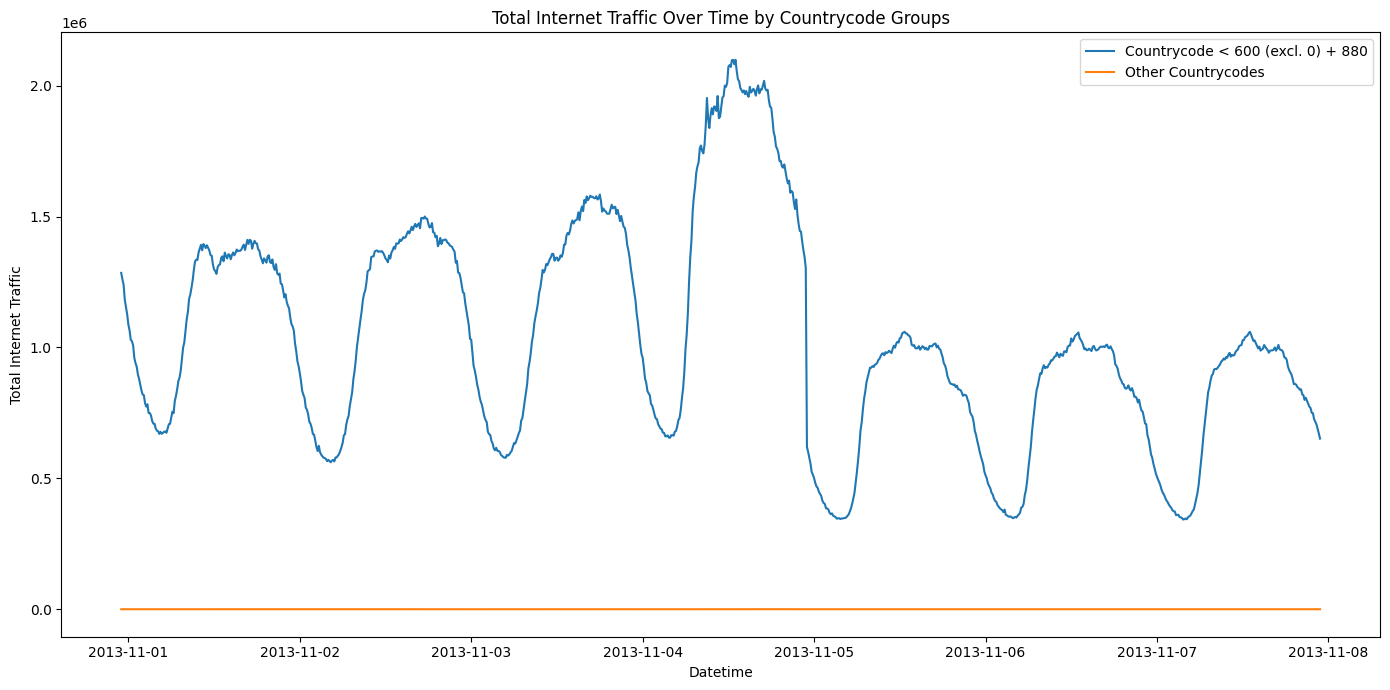

In [ ]:
import matplotlib.pyplot as plt

# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Define Group A: countrycode < 600, excluding 0, plus 880 included
group_a_mask = ((df['countrycode'] < 600) & (df['countrycode'] != 0)) | (df['countrycode'] == 880)

# Group B: all other countrycodes
group_b_mask = ~group_a_mask

# Aggregate total internet traffic over time for Group A
internet_group_a = df[group_a_mask].groupby('datetime')['internet'].sum()

# Aggregate total internet traffic over time for Group B
internet_group_b = df[group_b_mask].groupby('datetime')['internet'].sum()

# Plot the comparison
plt.figure(figsize=(14,7))
plt.plot(internet_group_a.index, internet_group_a, label='Countrycode < 600 (excl. 0) + 880')
plt.plot(internet_group_b.index, internet_group_b, label='Other Countrycodes')
plt.title('Total Internet Traffic Over Time by Countrycode Groups')
plt.xlabel('Datetime')
plt.ylabel('Total Internet Traffic')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-16-c5e539bfb27c>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


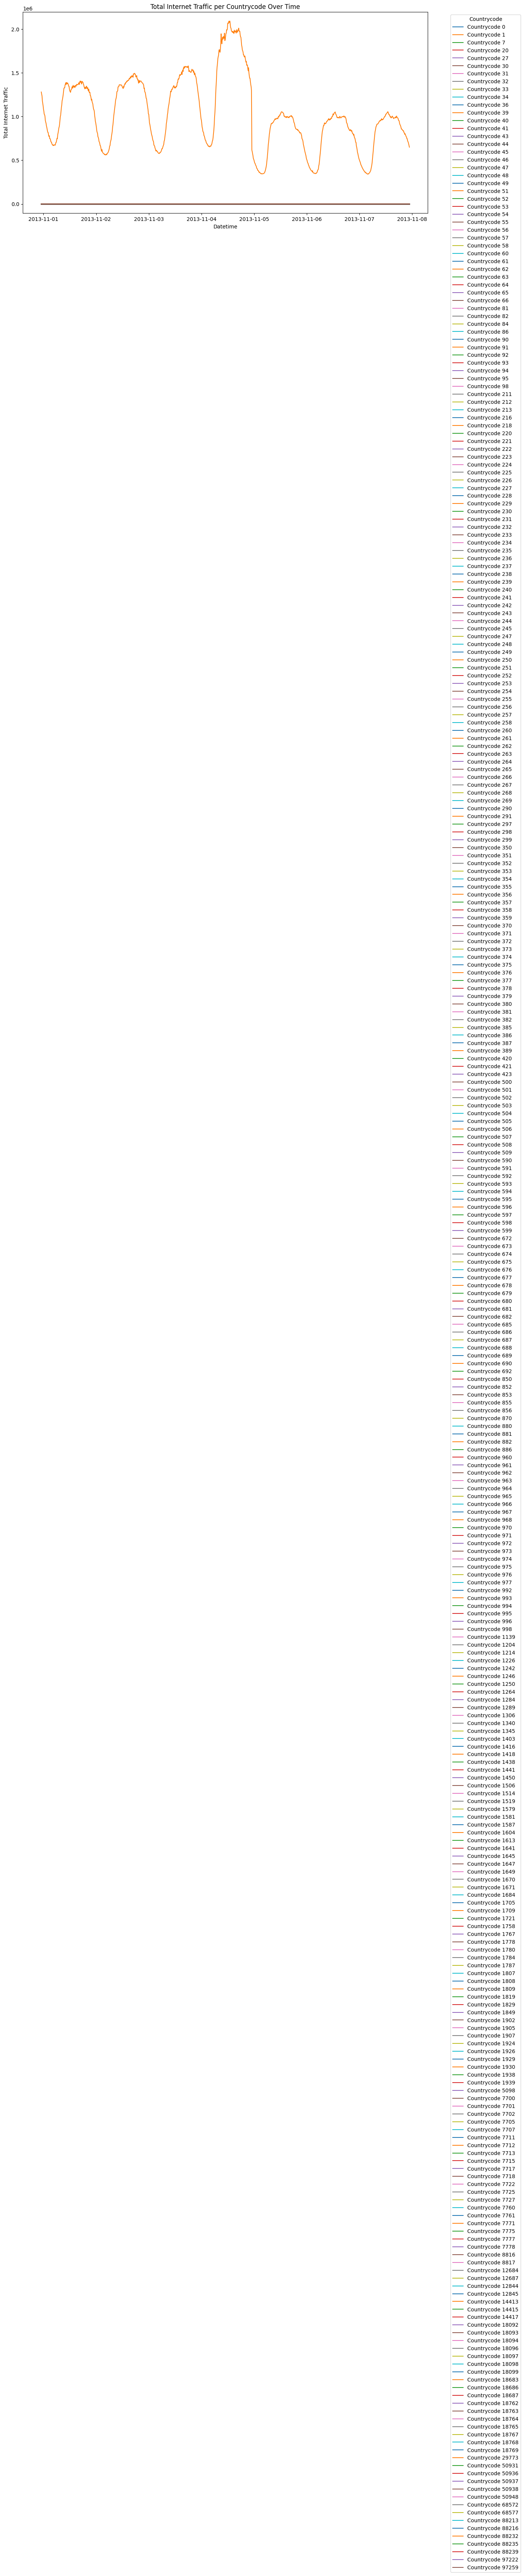

In [ ]:
import matplotlib.pyplot as plt

# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Group by datetime and countrycode and sum internet traffic
time_country_internet = df.groupby(['datetime', 'countrycode'])['internet'].sum().unstack(fill_value=0)

# Plot total internet traffic per countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_internet.columns:
    plt.plot(time_country_internet.index, time_country_internet[country], label=f'Countrycode {country}')
plt.title('Total Internet Traffic per Countrycode Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Internet Traffic')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Sum total internet traffic per countrycode
total_internet_per_country = df.groupby('countrycode')['internet'].sum().sort_values(ascending=False)

print(total_internet_per_country)


countrycode
39       1.039509e+09
33       4.595138e+05
44       3.615490e+05
46       3.257227e+05
49       3.155165e+05
             ...     
50937    0.000000e+00
50936    0.000000e+00
50931    0.000000e+00
29773    0.000000e+00
97259    0.000000e+00
Name: internet, Length: 326, dtype: float64


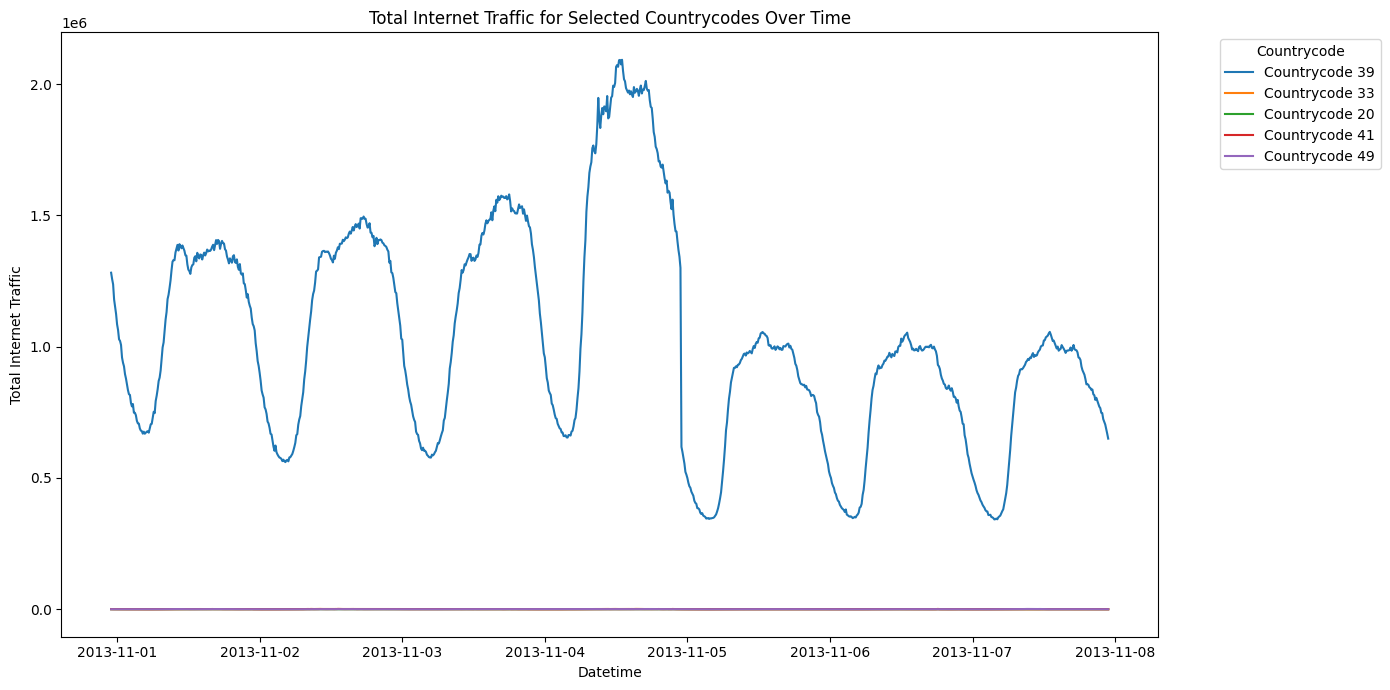

In [ ]:

# Convert datetime to datetime format if not done already
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

# Group by datetime and countrycode and sum internet traffic
time_country_internet = df.groupby(['datetime', 'countrycode'])['internet'].sum().unstack(fill_value=0)

# Specify country codes to include
selected_codes = [39, 33, 20, 41, 49]

# Filter to only selected country codes
time_country_internet_filtered = time_country_internet[selected_codes]

# Plot total internet traffic per selected countrycode over time
plt.figure(figsize=(14,7))
for country in time_country_internet_filtered.columns:
    plt.plot(time_country_internet_filtered.index, time_country_internet_filtered[country], label=f'Countrycode {country}')
plt.title('Total Internet Traffic for Selected Countrycodes Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Internet Traffic')
plt.legend(title='Countrycode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Drop All IDs, Let 39 Only

In [ ]:
# Keep only rows with countrycode == 39
df_2 = df[df['countrycode'] == 39]

df_2.head()

CellID            datetime  countrycode   internet
1        1 2013-12-26 23:00:00           39  10.251357
4        1 2013-12-26 23:10:00           39  10.414706
7        1 2013-12-26 23:20:00           39  11.323554
10       1 2013-12-26 23:30:00           39  10.645365
13       1 2013-12-26 23:40:00           39   9.847579

drop day 31-10-2013

In [ ]:
'only for the first week'

'''df_2['datetime'] = pd.to_datetime(df_2['datetime'], unit='ms')


# Filter out rows where the date is 2013-10-31
df_2 = df_2[df_2['datetime'].dt.date != pd.to_datetime('2013-10-31').date()]


df_2.head()'''


<ipython-input-6-93ebf75d60cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['datetime'] = pd.to_datetime(df_2['datetime'], unit='ms')


CellID            datetime  countrycode     smsin    smsout    callin  \
14       1 2013-11-01 00:00:00           39  0.135339  0.084937  0.053438   
16       1 2013-11-01 00:10:00           39  0.188777  0.026137  0.001787   
17       1 2013-11-01 00:20:00           39  0.242215  0.160314  0.108039   
19       1 2013-11-01 00:30:00           39  0.294490  0.245704  0.027300   
21       1 2013-11-01 00:40:00           39  0.108039  0.108039       NaN   

     callout  internet  
14  0.001787  8.026270  
16  0.054601  8.514179  
17  0.026137  6.833425  
19  0.080738  6.554605  
21       NaN  7.338716

# Drop Extra Columns

In [ ]:
# Drop unwanted columns
df_2['datetime'] = pd.to_datetime(df_2['datetime'], unit='ms')
df_2 = df_2.drop(columns=['countrycode', 'smsin', 'smsout', 'callin', 'callout'])

df_2.head()

<ipython-input-13-2193fcad9246>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['datetime'] = pd.to_datetime(df_2['datetime'], unit='ms')


CellID            datetime   internet
1        1 2013-12-26 23:00:00  10.251357
4        1 2013-12-26 23:10:00  10.414706
7        1 2013-12-26 23:20:00  11.323554
10       1 2013-12-26 23:30:00  10.645365
13       1 2013-12-26 23:40:00   9.847579

drop unwanted Ids

In [ ]:
# List of allowed CellIDs
allowed_cellids = [
    4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555,
    4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655,
    4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755,
    4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855,
    4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955,
    5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055,
    5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155,
    5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255,
    5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 5355,
    5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455
]

# Filter df_2 to keep only rows with CellID in allowed list
df_2 = df_2[df_2['CellID'].isin(allowed_cellids)]

# Optionally reset the index
df_2 = df_2.reset_index(drop=True)

df_2.head()

CellID            datetime    internet
0    4546 2013-12-26 23:00:00  251.661298
1    4546 2013-12-26 23:10:00  229.831110
2    4546 2013-12-26 23:20:00  242.242315
3    4546 2013-12-26 23:30:00  239.774931
4    4546 2013-12-26 23:40:00  235.255292

# Add to my Collected File

In [ ]:
'comment to avoid any addition to the file'
'''output_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Append df_week2_2 to the existing CSV file
df_2.to_csv(output_path, mode='a', header=False, index=False)'''

# Show My Collected File for tracing only

In [ ]:
import pandas as pd

# Path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Read the CSV file
df_Read = pd.read_csv(file_path)

In [ ]:

# Show first 5 rows
print("First 5 rows:")
print(df_Read.head())

# Show specific rows by index (e.g., rows with index 10, 20, 30)
specific_indices = [1000, 2000, 3000]
print(f"\nRows at indices {specific_indices}:")
print(df_Read.loc[specific_indices])

# Show the shape of the DataFrame
print(f"\nShape of the DataFrame: {df_Read.shape}")


First 5 rows:
   CellID             datetime    internet
0    4546  2013-11-01 00:00:00  251.868143
1    4546  2013-11-01 00:10:00  275.656908
2    4546  2013-11-01 00:20:00  263.815989
3    4546  2013-11-01 00:30:00  284.824317
4    4546  2013-11-01 00:40:00  337.275423

Rows at indices [1000, 2000, 3000]:
      CellID             datetime    internet
1000    4553  2013-11-01 05:40:00  219.163669
2000    4650  2013-11-01 11:20:00  336.248112
3000    4747  2013-11-01 17:00:00  261.464273

Shape of the DataFrame: (1078800, 3)


# Handling the **Missing**

In [ ]:

# Path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Read the CSV file
df_Read = pd.read_csv(file_path)

In [ ]:
null_counts = df_Read.isnull().sum()
null_percent = (null_counts / len(df_Read)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null %': null_percent})
print(null_summary)


          Null Count  Null %
CellID             0     0.0
datetime           0     0.0
internet           0     0.0


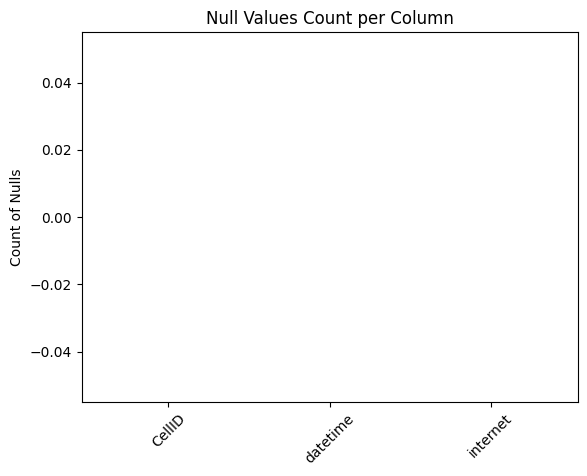

In [ ]:
import matplotlib.pyplot as plt

plt.bar(null_summary.index, null_summary['Null Count'])
plt.title('Null Values Count per Column')
plt.ylabel('Count of Nulls')
plt.xticks(rotation=45)
plt.show()


In [ ]:
nulls_by_cell = df_Read[df_Read['internet'].isnull()].groupby('CellID').size().sort_values(ascending=False)

print(nulls_by_cell.head(10))


Series([], dtype: int64)


# Change the DataSet Shape -> "df_grouped" will be used

In [ ]:
import pandas as pd

# Path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Read the CSV file
df_Read = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Assuming df_Read is already loaded

# Convert datetime column to datetime type if not already
df_Read['datetime'] = pd.to_datetime(df_Read['datetime'])

# Group by CellID and datetime, summing the internet traffic
df_grouped = df_Read.groupby(['CellID', 'datetime'], as_index=False)['internet'].sum()

# Set datetime as index
df_grouped = df_grouped.set_index('datetime')

print(df_grouped.head())
print(f"New shape: {df_grouped.shape}")


                     CellID    internet
datetime                               
2013-11-01 00:00:00    4546  503.736286
2013-11-01 00:10:00    4546  551.313816
2013-11-01 00:20:00    4546  527.631979
2013-11-01 00:30:00    4546  569.648635
2013-11-01 00:40:00    4546  674.550847
New shape: (820200, 2)


In [ ]:
print(df_grouped.tail(10))


                     CellID   internet
datetime                              
2013-12-27 21:20:00    5455  81.046695
2013-12-27 21:30:00    5455  63.275906
2013-12-27 21:40:00    5455  66.324451
2013-12-27 21:50:00    5455  64.688647
2013-12-27 22:00:00    5455  76.709334
2013-12-27 22:10:00    5455  88.085613
2013-12-27 22:20:00    5455  68.009826
2013-12-27 22:30:00    5455  73.264230
2013-12-27 22:40:00    5455  69.719986
2013-12-27 22:50:00    5455  69.075578


As we can note that my final dataset contain (820200, 2)

each day: 144 time stamp

last day in my data was 27-12-2013 at 22:50

so the total time stamps we have should be

144*(30[mounth'11]+27[mounth'12])= 8208 - 6

8202 * 100 [cells] = **820200**

# Visualization To choose the **Cell**

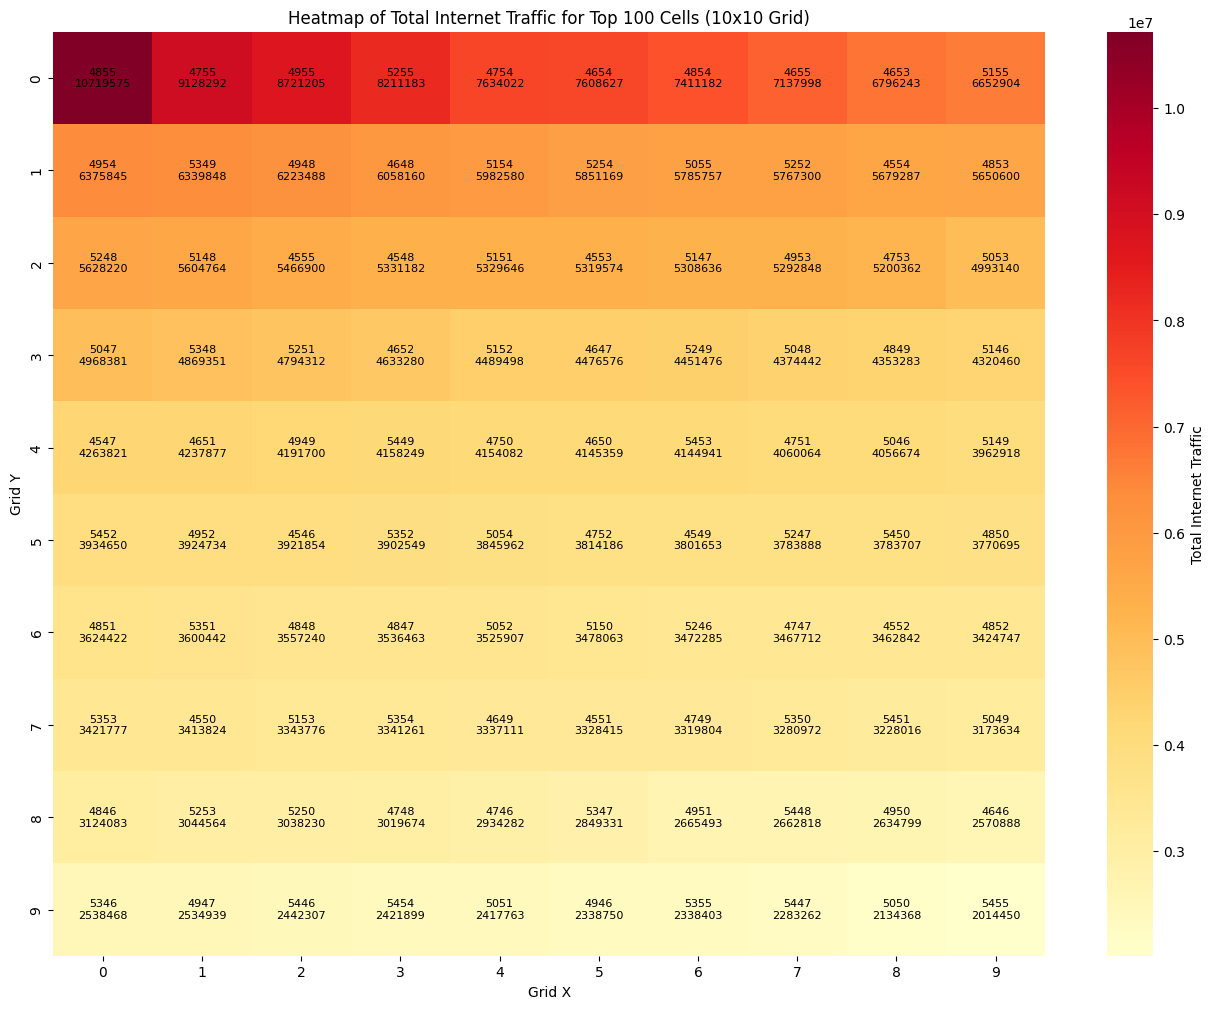

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total internet traffic per CellID
total_traffic = df_grouped.groupby('CellID')['internet'].sum()

# Take top 100 cells by total traffic (or all if less)
top_traffic = total_traffic.nlargest(100)

# Prepare data and labels
values = top_traffic.values
cell_ids = top_traffic.index.to_numpy().astype(str)  # Convert Index to numpy array

# If less than 100 cells, pad values and labels
n_cells = len(values)
if n_cells < 100:
    pad_len = 100 - n_cells
    values = np.append(values, [np.nan] * pad_len)
    cell_ids = np.append(cell_ids, [''] * pad_len)

# Reshape into 10x10 grid
grid_data = values.reshape(10, 10)
grid_labels = cell_ids.reshape(10, 10)

plt.figure(figsize=(16,12))
ax = sns.heatmap(grid_data, cmap='YlOrRd', cbar_kws={'label': 'Total Internet Traffic'}, annot=False)

# Annotate each cell with CellID and value
for i in range(10):
    for j in range(10):
        val = grid_data[i, j]
        label = grid_labels[i, j]
        if not np.isnan(val):
            ax.text(j + 0.5, i + 0.5, f'{label}\n{val:.0f}',
                    ha='center', va='center', color='black', fontsize=8)

plt.title('Heatmap of Total Internet Traffic for Top 100 Cells (10x10 Grid)')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.show()


**Metrices** I can use to compare the cells

| Method                 | Pros                          | Cons                             |
|------------------------|-------------------------------|---------------------------------|
| Single Lag Autocorr     | Simple, fast                  | Only detects one cycle, sensitive to noise |
| Multi Lag Autocorr & PACF | Detect multiple seasonalities | Still linear, may miss complex patterns |
| STL Decomposition      | Robust, separates trend/seasonality | Needs minimum data length, heavier compute |
| FFT Spectral Analysis  | Identifies dominant frequencies | Assumes stationarity, sensitive to noise |
| Entropy Measures       | Nonlinear, captures complexity | Computationally intensive       |


Using **STL Decompsition** For the **Seasonality**, and the **Outliers**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from scipy.stats import zscore


# Group data by CellID
grouped = df_grouped.groupby('CellID')

# Total internet traffic per cell
total_traffic = grouped['internet'].sum()

# Null percentage per cell
null_pct = grouped['internet'].apply(lambda x: x.isnull().mean())

# Stability: Coefficient of Variation (std / mean)
coef_var = grouped['internet'].agg(lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan)

'''
# Outlier count: Define outliers as points beyond 3*std from mean
def count_outliers(x):
    mean = x.mean()
    std = x.std()
    return ((x > mean + 3*std) | (x < mean - 3*std)).sum()

outlier_counts = grouped['internet'].apply(count_outliers)
'''
# New outlier detection function using seasonal decomposition and z-score
def count_outliers_using_stl(x, period=144):
    try:
        # Drop missing values
        #x = x.dropna()

        if len(x) < period * 2:  # Ensure enough data for decomposition
            return np.nan

        # Apply seasonal decomposition (STL)
        stl = STL(x, period=period, robust=True)
        result = stl.fit()

        # Extract the residual component
        residuals = result.resid

        # Apply z-score to the residuals
        z_scores = zscore(residuals)

        # Identify outliers as those with z-score greater than 3 or less than -3
        outliers = np.sum(np.abs(z_scores) > 3)  # You can adjust the threshold if needed

        return outliers
    except Exception as e:
        return np.nan

# Apply the outlier detection with STL and z-score
outlier_counts = grouped['internet'].apply(count_outliers_using_stl)
'''
# Seasonality strength: Approximate by lag-144 autocorrelation (daily pattern assuming 10-min interval)
def seasonality_strength(x):
    return x.autocorr(lag=144)  # 144 ten-minute intervals in 1 day

seasonality = grouped['internet'].apply(seasonality_strength)
'''
# Define STL-based seasonality strength function
def stl_seasonality_strength(x):
    try:
        #x = x.dropna()
        if len(x) < 7 * 144:  # at least two full daily cycles for stability
            return np.nan
        stl = STL(x, period=144, robust=True)
        res = stl.fit()
        seasonal_var = np.var(res.seasonal)
        resid_var = np.var(res.resid)
        # Seasonality strength ratio: higher means stronger seasonality
        return seasonal_var / (seasonal_var + resid_var)
    except Exception as e:
        return np.nan

# Replace previous seasonality with STL-based seasonality strength
seasonality = grouped['internet'].apply(stl_seasonality_strength)

# Compile metrics into DataFrame
metrics_df = pd.DataFrame({
    'TotalTraffic': total_traffic,
    'NullPct': null_pct,
    'CoefVar': coef_var,
    'OutlierCount': outlier_counts,
    'Seasonality': seasonality
})

# Sort by TotalTraffic descending to start with most active cells
metrics_df = metrics_df.sort_values(by='TotalTraffic', ascending=False)

metrics_df.head(10)


TotalTraffic  NullPct   CoefVar  OutlierCount  Seasonality
CellID                                                            
4855    1.071957e+07      0.0  0.598233           247     0.737028
4755    9.128292e+06      0.0  0.513722           214     0.766600
4955    8.721205e+06      0.0  0.916392           265     0.702517
5255    8.211183e+06      0.0  0.684926           230     0.742158
4754    7.634022e+06      0.0  0.508736           232     0.756138
4654    7.608627e+06      0.0  0.537992           243     0.800738
4854    7.411182e+06      0.0  0.528924           209     0.701841
4655    7.137998e+06      0.0  0.509919           253     0.819756
4653    6.796243e+06      0.0  0.571995           255     0.790454
5155    6.652904e+06      0.0  0.752899           263     0.702996

1. CoefVar (Stability / Variability)
Range from ~0.5 to 0.92.

Lower values (~0.5) mean stable traffic patterns; easier to forecast.

Higher values (~0.9) imply more volatility or noise, which may complicate modeling but might be interesting for anomaly detection.

2. OutlierCount (Irregular Spikes)
Wide range outliers detected.

Cells with low outlier counts suggest smoother traffic, better for classic forecasting.

Higher outliers might indicate anomalies, bursts, or noisy data.

3. Seasonality (Daily Pattern Strength)
Values ~0.76 to 0.88 indicate strong daily/weekly cycles.

Strong seasonality supports time series models that leverage periodic patterns (ARIMA with seasonality, SARIMA, LSTM with cyclical inputs).


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'metrics_df' contains your computed metrics with CellID as index

# Normalize/scale metrics for fair combination
metrics_norm = pd.DataFrame()

# Higher TotalTraffic is better → scale 0 to 1
metrics_norm['TotalTraffic'] = (metrics_df['TotalTraffic'] - metrics_df['TotalTraffic'].min()) / (metrics_df['TotalTraffic'].max() - metrics_df['TotalTraffic'].min())

# Lower NullPct is better → invert and scale
metrics_norm['NullPct'] = 1 - metrics_df['NullPct']

# Lower CoefVar (variability) is better → invert and scale
metrics_norm['CoefVar'] = 1 - ((metrics_df['CoefVar'] - metrics_df['CoefVar'].min()) / (metrics_df['CoefVar'].max() - metrics_df['CoefVar'].min()))

# Lower OutlierCount is better → invert and scale
metrics_norm['OutlierCount'] = 1 - ((metrics_df['OutlierCount'] - metrics_df['OutlierCount'].min()) / (metrics_df['OutlierCount'].max() - metrics_df['OutlierCount'].min()))

# Higher Seasonality is better → scale 0 to 1
metrics_norm['Seasonality'] = (metrics_df['Seasonality'] - metrics_df['Seasonality'].min()) / (metrics_df['Seasonality'].max() - metrics_df['Seasonality'].min())

# Assign weights to each metric based on importance (you can adjust these)
weights = {
    'TotalTraffic': 0.3,
    'NullPct': 0.0,
    'CoefVar': 0.25,
    'OutlierCount': 0.2,
    'Seasonality': 0.25
}

# Calculate weighted score
metrics_norm['Score'] = (
    metrics_norm['TotalTraffic'] * weights['TotalTraffic'] +
    metrics_norm['NullPct'] * weights['NullPct'] +
    metrics_norm['CoefVar'] * weights['CoefVar'] +
    metrics_norm['OutlierCount'] * weights['OutlierCount'] +
    metrics_norm['Seasonality'] * weights['Seasonality']
)

# Rank cells by descending score
metrics_norm = metrics_norm.sort_values(by='Score', ascending=False)

print(metrics_norm[['Score']].head(10))  # Top 10 best cells


           Score
CellID          
4755    0.760353
4855    0.704367
4648    0.681833
4754    0.679354
4654    0.676411
4655    0.673469
5151    0.660493
4555    0.660077
4854    0.657946
5349    0.652281


# Choose Cell: 4755

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Read the CSV file
df_Read = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Assuming df_Read is already loaded

# Convert datetime column to datetime type if not already
df_Read['datetime'] = pd.to_datetime(df_Read['datetime'])

# Group by CellID and datetime, summing the internet traffic
df_grouped = df_Read.groupby(['CellID', 'datetime'], as_index=False)['internet'].sum()

# Set datetime as index
df_grouped = df_grouped.set_index('datetime')

print(df_grouped.head())
print(f"New shape: {df_grouped.shape}")

                     CellID    internet
datetime                               
2013-11-01 00:00:00    4546  503.736286
2013-11-01 00:10:00    4546  551.313816
2013-11-01 00:20:00    4546  527.631979
2013-11-01 00:30:00    4546  569.648635
2013-11-01 00:40:00    4546  674.550847
New shape: (820200, 2)


Only the 4755 Cell

In [ ]:
# Filter only CellID 4755
cell_4755 = df_grouped[df_grouped['CellID'] == 4755].copy()

# Drop CellID column since it's constant now
cell_4755.drop(columns='CellID', inplace=True)

# Sort by datetime just in case
cell_4755 = cell_4755.sort_index()

print(cell_4755.head())
print(cell_4755.shape)

                        internet
datetime                        
2013-11-01 00:00:00  1882.835224
2013-11-01 00:10:00  1792.001814
2013-11-01 00:20:00  1721.562928
2013-11-01 00:30:00  1608.051995
2013-11-01 00:40:00  1533.467322
(8202, 1)


save to CSV files

In [ ]:
'''
# Filter only CellID 4755
cell_4648 = df_grouped[df_grouped['CellID'] == 4648].copy()

# Drop CellID column since it's constant now
cell_4648.drop(columns='CellID', inplace=True)

# Sort by datetime just in case
cell_4648 = cell_4648.sort_index()

print(cell_4648.head())
print(cell_4648.shape)
'''

                        internet
datetime                        
2013-11-01 00:00:00  1013.869587
2013-11-01 00:10:00   947.380127
2013-11-01 00:20:00   779.990668
2013-11-01 00:30:00   833.601005
2013-11-01 00:40:00  1013.101858
(8202, 1)


In [ ]:
'''
# Define output path
output_path = '/content/drive/MyDrive/data_folder/cell_4648.csv'

# Save DataFrame
cell_4648.to_csv(output_path)
print(f'Data saved to {output_path}')
'''

Data saved to /content/drive/MyDrive/data_folder/cell_4648.csv


Visualize raw time series

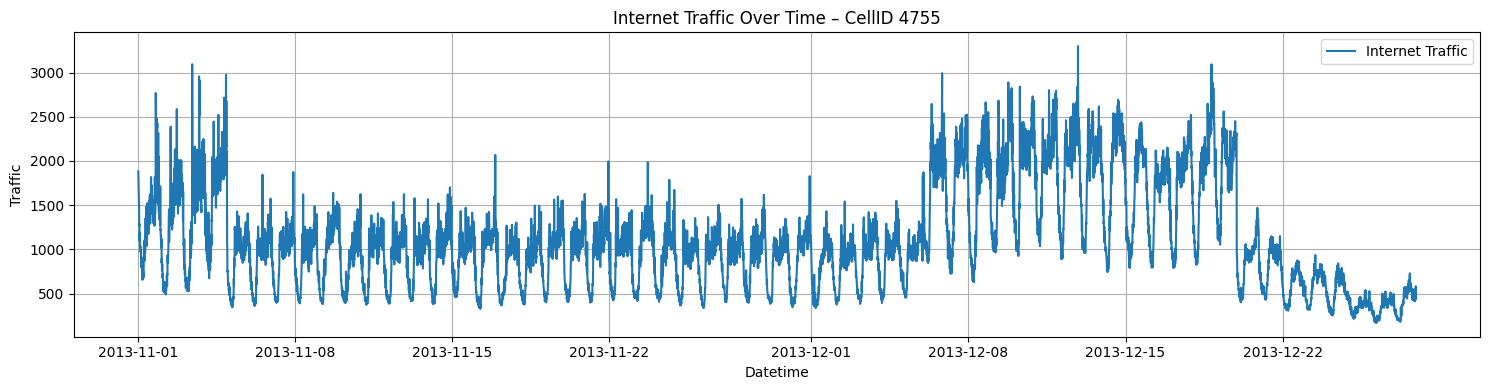

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(cell_4755.index, cell_4755['internet'], label='Internet Traffic')
plt.title('Internet Traffic Over Time – CellID 4755')
plt.xlabel('Datetime')
plt.ylabel('Traffic')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RCA = Root Cause Analysis

🔎 RCA is a problem-solving process that finds the real reason why something went wrong — not just the surface symptom.

Check trend, seasonality, residuals

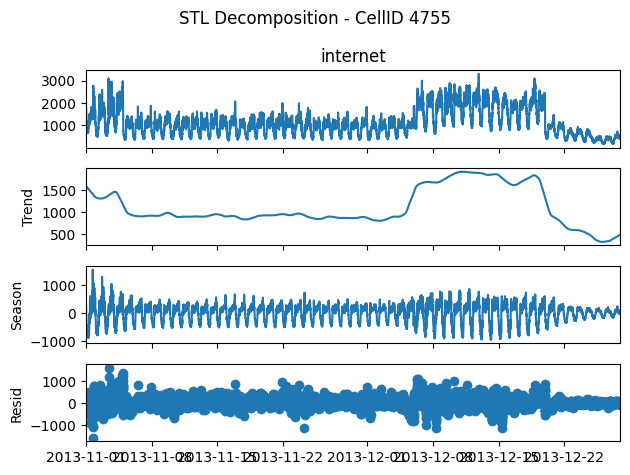

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(cell_4755['internet'], period=144, robust=True)  # 144 = daily cycle
res = stl.fit()

res.plot()
plt.suptitle('STL Decomposition - CellID 4755')
plt.tight_layout()
plt.show()


change point detection algorithms on the trend

In [ ]:
!pip install ruptures


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00


In [ ]:
import ruptures as rpt

trend = res.trend.dropna().values
algo = rpt.Pelt(model="rbf").fit(trend)
change_points = algo.predict(pen=10)

print("Detected change points at indices:", change_points)


Detected change points at indices: [85, 540, 615, 3410, 4910, 4980, 5055, 5535, 6395, 6725, 6990, 7055, 7120, 7330, 7735, 8202]


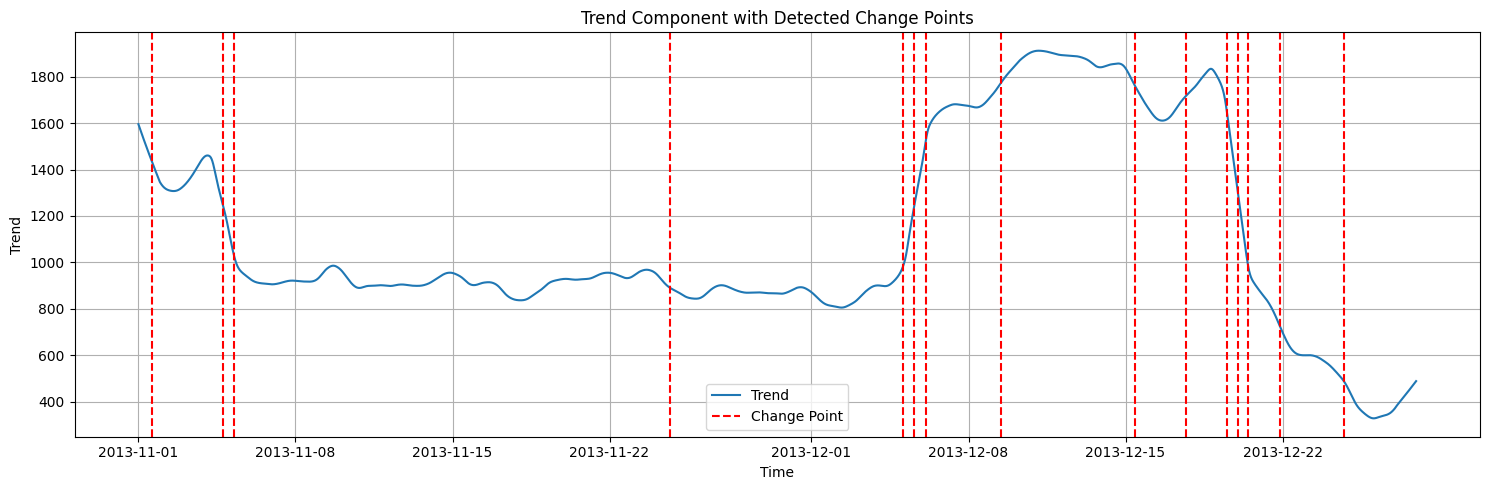

In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np

# Plot the trend
plt.figure(figsize=(15, 5))
plt.plot(res.trend.index, trend, label='Trend')

# Mark change points on the plot
for cp in change_points[:-1]:  # last point is length of signal
    plt.axvline(res.trend.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")

plt.title('Trend Component with Detected Change Points')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Take only subset for the dataset

In [ ]:
# Extract data between 2013-11-05 and 2013-12-05 (inclusive)
start_date = '2013-11-05'
end_date = '2013-12-05'

cell_4755_subset = cell_4755.loc[start_date:end_date].copy()

print(cell_4755_subset.head())
print(cell_4755_subset.shape)

                       internet
datetime                       
2013-11-05 00:00:00  637.314733
2013-11-05 00:10:00  617.837502
2013-11-05 00:20:00  594.127909
2013-11-05 00:30:00  621.263989
2013-11-05 00:40:00  610.602649
(4464, 1)


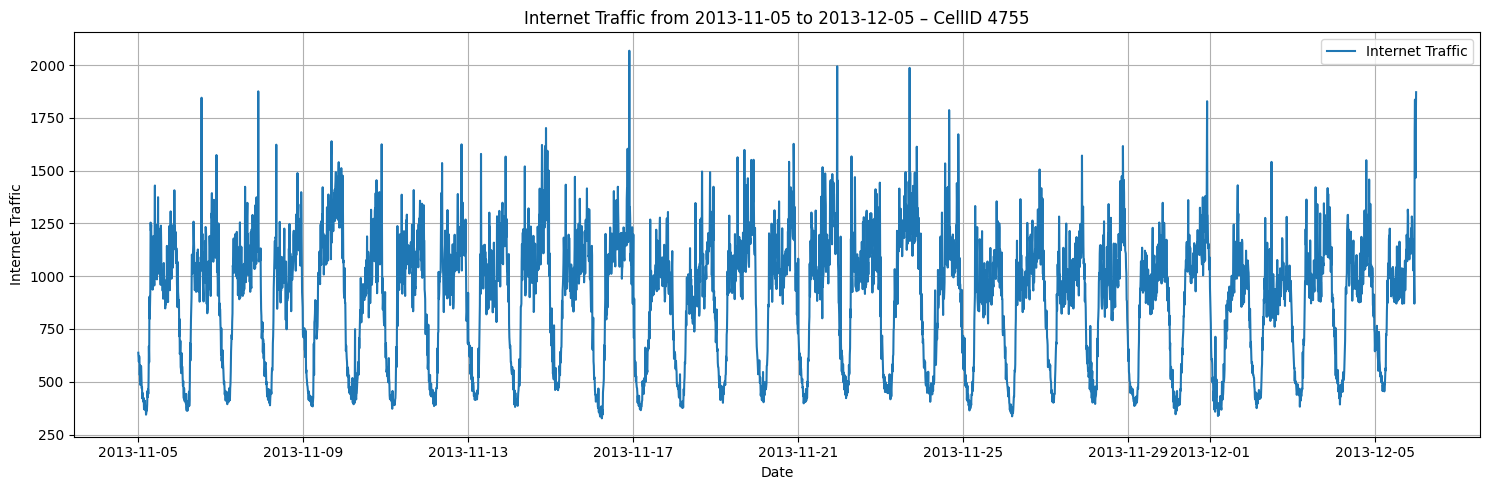

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(cell_4755_subset.index, cell_4755_subset['internet'], label='Internet Traffic')
plt.title('Internet Traffic from 2013-11-05 to 2013-12-05 – CellID 4755')
plt.xlabel('Date')
plt.ylabel('Internet Traffic')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Train & Test

In [ ]:
train_end_date = '2013-11-29'

train = cell_4755_subset[:train_end_date]
test = cell_4755_subset[train_end_date:]

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (3600, 1)
Test shape: (1008, 1)


to apple to continue as before i will assign the train data to the "cell_4755_subset"

In [ ]:
cell_4755_subset=train

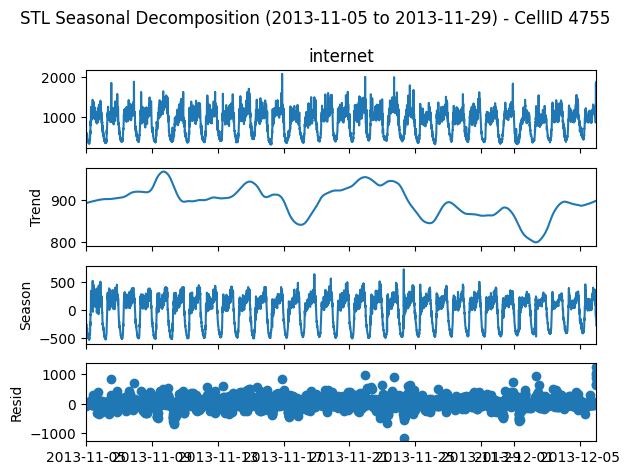

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(cell_4755_subset['internet'], period=144, robust=True)  # 144 = daily cycle
res = stl.fit()

res.plot()
plt.suptitle('STL Seasonal Decomposition (2013-11-05 to 2013-11-29) - CellID 4755')
plt.tight_layout()
plt.show()


Applying the z-score on the STL residuals

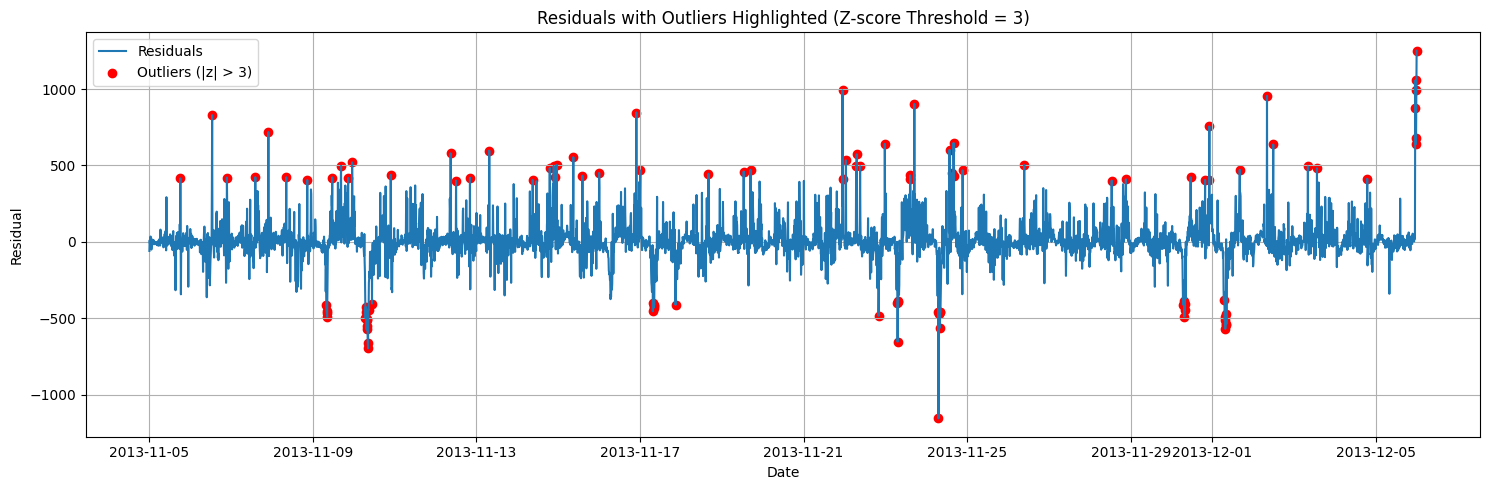

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Extract residuals from STL result
residuals = res.resid

# Calculate z-score of residuals
z_scores = zscore(residuals)

# Define an outlier threshold (commonly 3 or -3)
threshold = 3

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Plot residuals and mark outliers
plt.figure(figsize=(15, 5))
plt.plot(residuals.index, residuals, label='Residuals')
plt.scatter(residuals.index[outliers], residuals.iloc[outliers], color='red', label='Outliers (|z| > 3)')
plt.title('Residuals with Outliers Highlighted (Z-score Threshold = 3)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Count and display all outliers with info

In [ ]:
import pandas as pd

# Create a DataFrame with residuals and z-scores
residuals_df = pd.DataFrame({
    'Residual': residuals,
    'Z_score': z_scores
})

# Filter the outliers (|z| > 3)
outliers_df = residuals_df[np.abs(residuals_df['Z_score']) > 3]

# Display number of outliers
print(f"Number of outliers detected: {len(outliers_df)}")

# Show detailed info: date, residual, z-score
print(outliers_df)


Number of outliers detected: 110
                        Residual   Z_score
datetime                                  
2013-11-05 18:10:00   415.165198  3.117215
2013-11-06 12:50:00   828.808623  6.306942
2013-11-06 21:30:00   420.802654  3.160687
2013-11-07 14:10:00   423.878022  3.184402
2013-11-07 21:50:00   718.281116  5.454632
...                          ...       ...
2013-12-05 23:10:00  1058.476187  8.077977
2013-12-05 23:20:00   639.930340  4.850446
2013-12-05 23:30:00   681.493664  5.170953
2013-12-05 23:40:00   995.110420  7.589345
2013-12-05 23:50:00  1251.184072  9.564004

[110 rows x 2 columns]


Remove outliers from original data and save new dataset

In [ ]:
# Get timestamps of outliers
outlier_timestamps = outliers_df.index

# Remove these timestamps from the original data
cell_4755_subset_outlierless = cell_4755_subset.drop(index=outlier_timestamps)

print(f"Original data shape: {cell_4755_subset.shape}")
print(f"Cleaned data shape: {cell_4755_subset_outlierless.shape}")


Original data shape: (4464, 1)
Cleaned data shape: (4354, 1)


plot the residuals after filtering out the outliers:

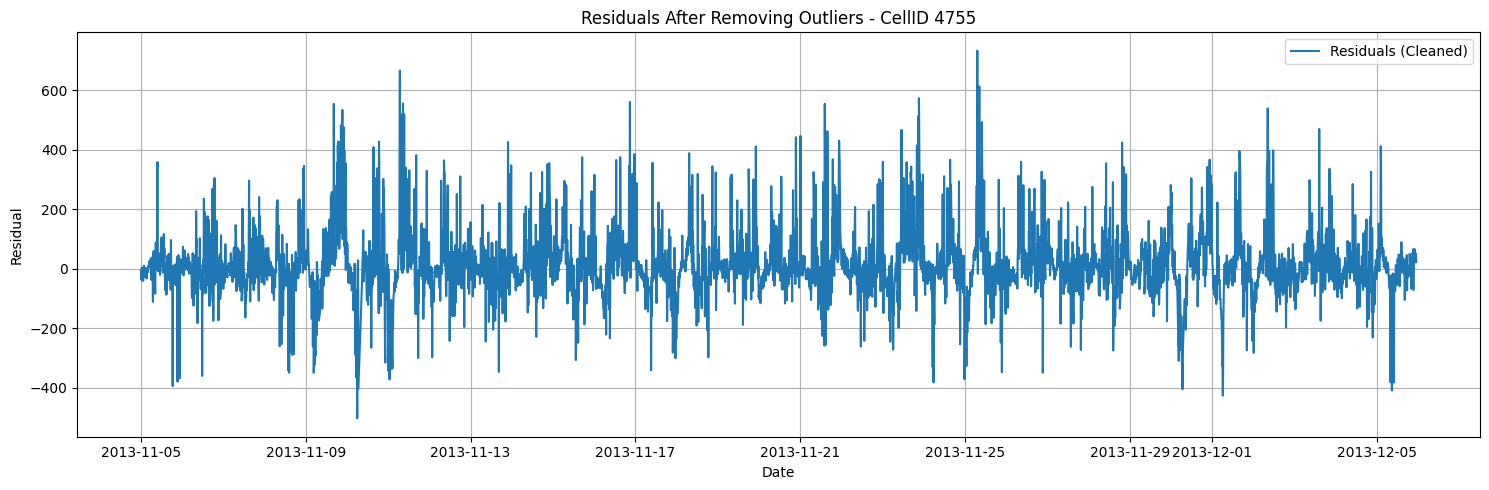

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals again for the cleaned data using STL
cleaned_series = cell_4755_subset_outlierless['internet'].dropna()
stl_cleaned = STL(cleaned_series, period=144, robust=True)
result_cleaned = stl_cleaned.fit()

# Plot cleaned residuals
plt.figure(figsize=(15, 5))
plt.plot(result_cleaned.resid.index, result_cleaned.resid, label='Residuals (Cleaned)')
plt.title('Residuals After Removing Outliers - CellID 4755')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


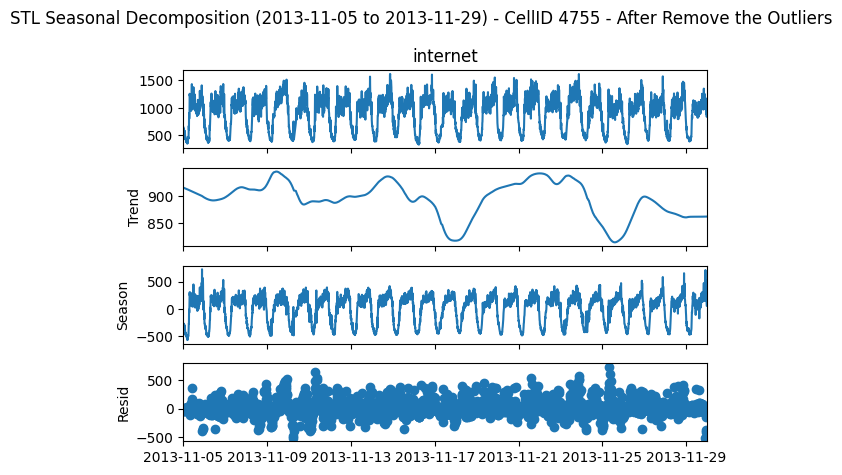

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(cell_4755_subset_outlierless['internet'], period=144, robust=True)  # 144 = daily cycle
res = stl.fit()

res.plot()
plt.suptitle('STL Seasonal Decomposition (2013-11-05 to 2013-11-29) - CellID 4755 - After Remove the Outliers')
plt.tight_layout()
plt.show()


Stationarity check (ADF Test)

Stationary = A time series whose mean, variance, and autocorrelation structure do not change over time.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cell_4755_subset_outlierless['internet'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -11.033000870967854
p-value: 5.606828967395018e-20


p < 0.05 → Stationary (good)

p ≥ 0.05 → Non-stationary → will need differencing

Seasonal stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Seasonal differencing
seasonal_diff = cell_4755['internet'].diff(144).dropna()

# ADF test on seasonally differenced data
result = adfuller(seasonal_diff)
print('ADF Statistic (seasonally differenced):', result[0])
print('p-value:', result[1])


ADF Statistic (seasonally differenced): -7.479559118054391
p-value: 4.812483620040777e-11


Seasonality | using the Fourier Transform (FT) for detecting seasonality

Apply Fast Fourier Transform (FFT) : to convert the time series to frequency domain:

In [ ]:
import numpy as np

series = cell_4755_subset_outlierless['internet'].dropna()


# Subtract mean to center the data (important to avoid large zero-frequency component)
series_centered = series - np.mean(series)

# Apply FFT
fft_values = np.fft.fft(series_centered)

# Get corresponding frequencies
freq = np.fft.fftfreq(len(series_centered), d=10*60)  # d=10*60 seconds since interval is 10 min


Calculate power spectrum (magnitude squared)

In [ ]:
power = np.abs(fft_values)**2


Identify dominant frequencies

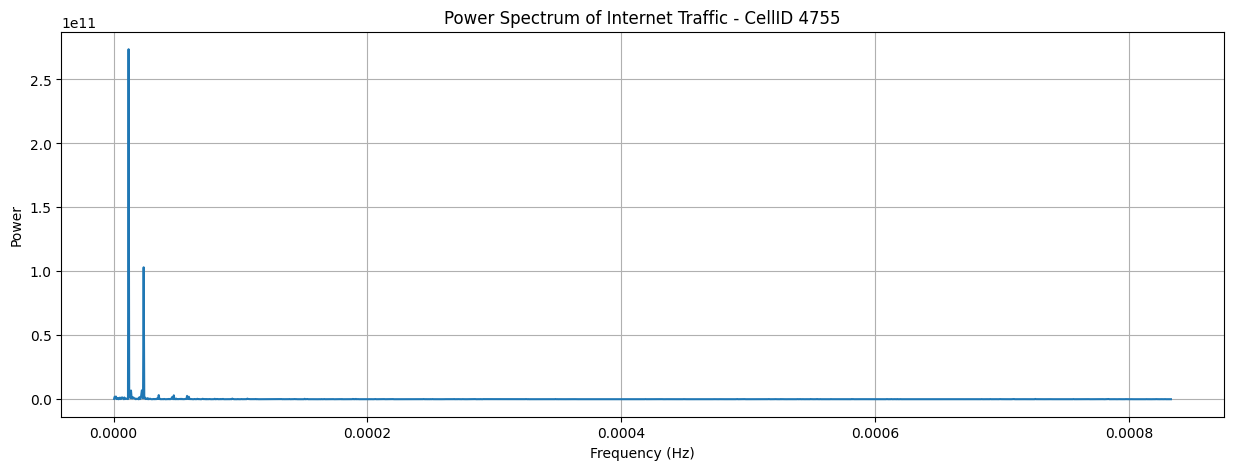

In [ ]:
import matplotlib.pyplot as plt

# Exclude negative frequencies and zero frequency
positive_freqs = freq[freq > 0]
positive_power = power[freq > 0]

plt.figure(figsize=(15, 5))
plt.plot(positive_freqs, positive_power)
plt.title('Power Spectrum of Internet Traffic - CellID 4755')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()


Convert frequency to meaningful period

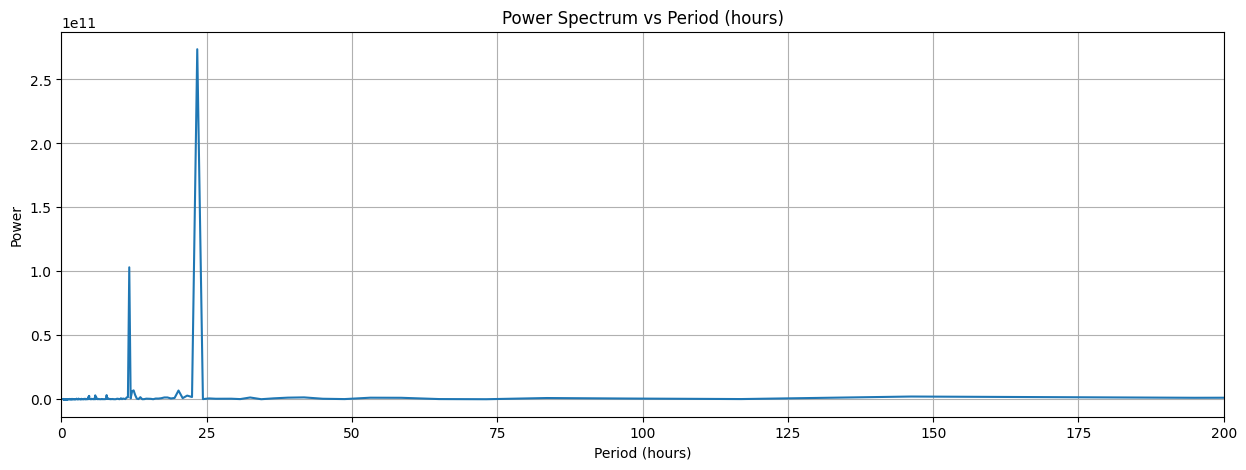

In [ ]:
period_seconds = 1 / positive_freqs  # seconds per cycle
period_hours = period_seconds / 3600  # convert to hours

# Plot power vs period (hours)
plt.figure(figsize=(15, 5))
plt.plot(period_hours, positive_power)
plt.title('Power Spectrum vs Period (hours)')
plt.xlabel('Period (hours)')
plt.ylabel('Power')
plt.xlim(0, 200)  # focus on plausible cycles like daily (24h), weekly (168h)
plt.grid(True)
plt.show()


Peaks near 24 hours (~1 day) → strong daily seasonality.

Peaks near 168 hours (~7 days) → weekly seasonality.

ACF and PACF

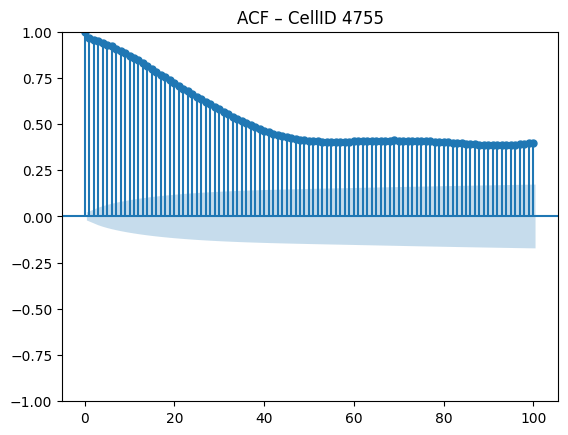

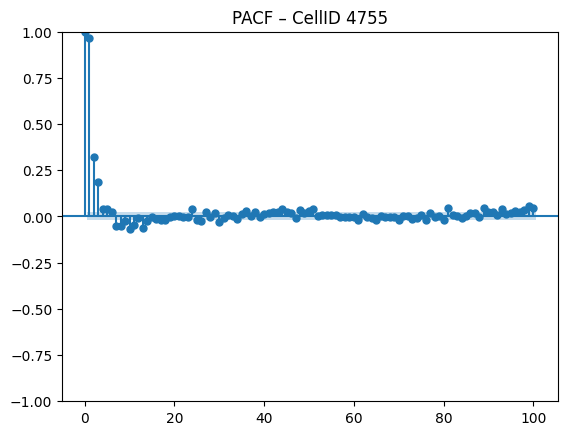

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(cell_4755['internet'].dropna(), lags=100)
plt.title('ACF – CellID 4755')
plt.show()

plot_pacf(cell_4755['internet'].dropna(), lags=100)
plt.title('PACF – CellID 4755')
plt.show()


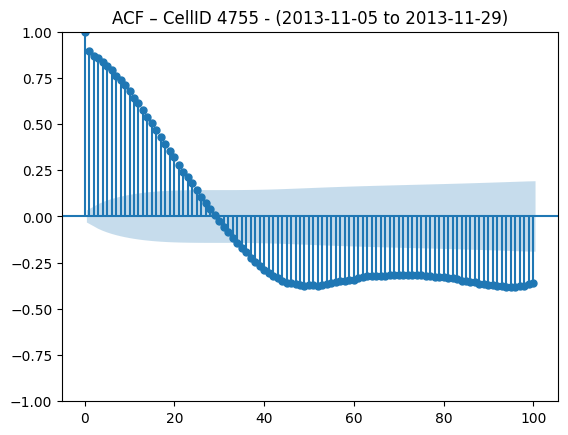

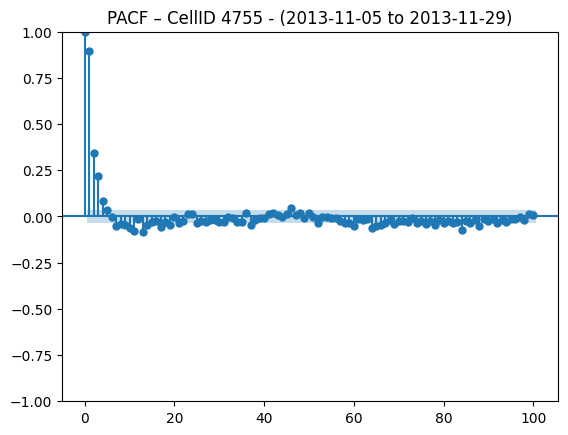

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(cell_4755_subset['internet'].dropna(), lags=100)
plt.title('ACF – CellID 4755 - (2013-11-05 to 2013-11-29)')
plt.show()

plot_pacf(cell_4755_subset['internet'].dropna(), lags=100)
plt.title('PACF – CellID 4755 - (2013-11-05 to 2013-11-29)')
plt.show()


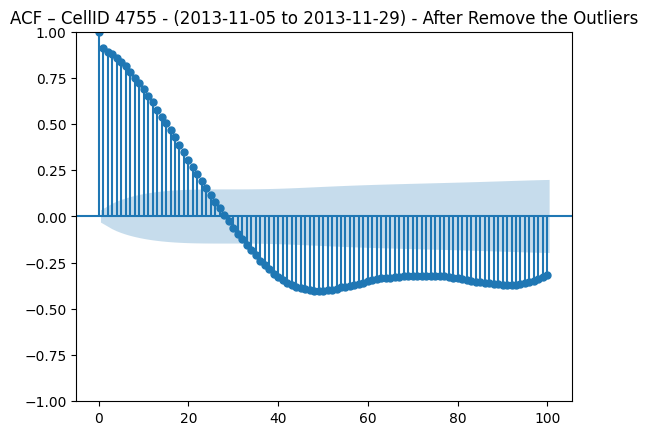

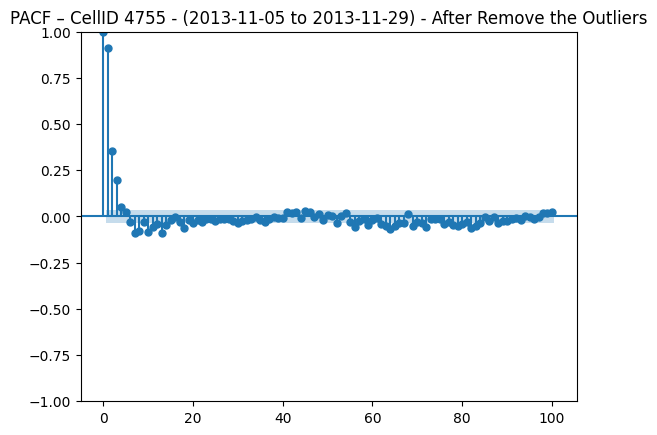

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(cell_4755_subset_outlierless['internet'].dropna(), lags=100)
plt.title('ACF – CellID 4755 - (2013-11-05 to 2013-11-29) - After Remove the Outliers')
plt.show()

plot_pacf(cell_4755_subset_outlierless['internet'].dropna(), lags=100)
plt.title('PACF – CellID 4755 - (2013-11-05 to 2013-11-29) - After Remove the Outliers')
plt.show()


# My Own Model

Pre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/data_folder/Collected_File.csv'

# Read the CSV file
df_Read = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Assuming df_Read is already loaded

# Convert datetime column to datetime type if not already
df_Read['datetime'] = pd.to_datetime(df_Read['datetime'])

# Group by CellID and datetime, summing the internet traffic
df_grouped = df_Read.groupby(['CellID', 'datetime'], as_index=False)['internet'].sum()

# Set datetime as index
df_grouped = df_grouped.set_index('datetime')

print(df_grouped.head())
print(f"New shape: {df_grouped.shape}")

                     CellID    internet
datetime                               
2013-11-01 00:00:00    4546  503.736286
2013-11-01 00:10:00    4546  551.313816
2013-11-01 00:20:00    4546  527.631979
2013-11-01 00:30:00    4546  569.648635
2013-11-01 00:40:00    4546  674.550847
New shape: (820200, 2)


In [ ]:
# Filter only CellID 4755
cell_4755 = df_grouped[df_grouped['CellID'] == 4755].copy()

# Drop CellID column since it's constant now
cell_4755.drop(columns='CellID', inplace=True)

# Sort by datetime just in case
cell_4755 = cell_4755.sort_index()

print(cell_4755.head())
print(cell_4755.shape)

                        internet
datetime                        
2013-11-01 00:00:00  1882.835224
2013-11-01 00:10:00  1792.001814
2013-11-01 00:20:00  1721.562928
2013-11-01 00:30:00  1608.051995
2013-11-01 00:40:00  1533.467322
(8202, 1)


In [ ]:
# Extract data between 2013-11-05 and 2013-12-05 (inclusive)
start_date = '2013-11-05'
end_date = '2013-12-05'

cell_4755_subset = cell_4755.loc[start_date:end_date].copy()

print(cell_4755_subset.head())
print(cell_4755_subset.shape)

                       internet
datetime                       
2013-11-05 00:00:00  637.314733
2013-11-05 00:10:00  617.837502
2013-11-05 00:20:00  594.127909
2013-11-05 00:30:00  621.263989
2013-11-05 00:40:00  610.602649
(4464, 1)


In [ ]:
is_regular = (cell_4755_subset.index.to_series().diff().dropna() == pd.Timedelta('10min')).all()
print("Regular 10min interval:", is_regular)


Regular 10min interval: True


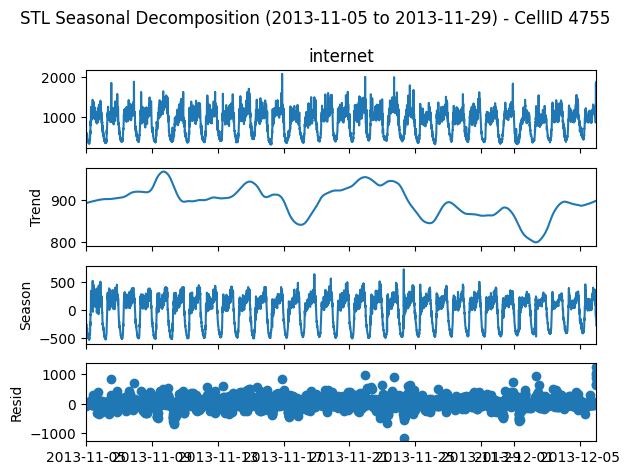

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(cell_4755_subset['internet'], period=144, robust=True)  # 144 = daily cycle
res = stl.fit()

res.plot()
plt.suptitle('STL Seasonal Decomposition (2013-11-05 to 2013-11-29) - CellID 4755')
plt.tight_layout()
plt.show()


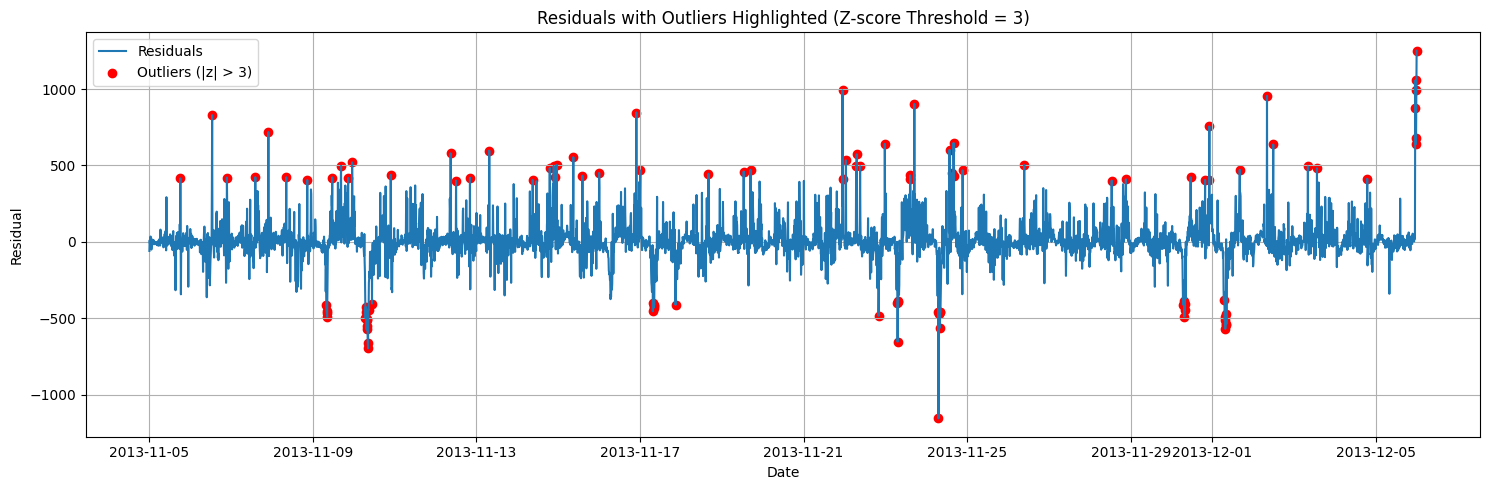

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Extract residuals from STL result
residuals = res.resid

# Calculate z-score of residuals
z_scores = zscore(residuals)

# Define an outlier threshold (commonly 3 or -3)
threshold = 3

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Plot residuals and mark outliers
plt.figure(figsize=(15, 5))
plt.plot(residuals.index, residuals, label='Residuals')
plt.scatter(residuals.index[outliers], residuals.iloc[outliers], color='red', label='Outliers (|z| > 3)')
plt.title('Residuals with Outliers Highlighted (Z-score Threshold = 3)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with residuals and z-scores
residuals_df = pd.DataFrame({
    'Residual': residuals,
    'Z_score': z_scores
})

# Filter the outliers (|z| > 3)
outliers_df = residuals_df[np.abs(residuals_df['Z_score']) > 3]

# Display number of outliers
print(f"Number of outliers detected: {len(outliers_df)}")

# Show detailed info: date, residual, z-score
print(outliers_df)


Number of outliers detected: 110
                        Residual   Z_score
datetime                                  
2013-11-05 18:10:00   415.165198  3.117215
2013-11-06 12:50:00   828.808623  6.306942
2013-11-06 21:30:00   420.802654  3.160687
2013-11-07 14:10:00   423.878022  3.184402
2013-11-07 21:50:00   718.281116  5.454632
...                          ...       ...
2013-12-05 23:10:00  1058.476187  8.077977
2013-12-05 23:20:00   639.930340  4.850446
2013-12-05 23:30:00   681.493664  5.170953
2013-12-05 23:40:00   995.110420  7.589345
2013-12-05 23:50:00  1251.184072  9.564004

[110 rows x 2 columns]


In [ ]:
# Get timestamps of outliers
outlier_timestamps = outliers_df.index

# Remove these timestamps from the original data
cell_4755_subset_outlierless = cell_4755_subset.drop(index=outlier_timestamps)

print(f"Original data shape: {cell_4755_subset.shape}")
print(f"Cleaned data shape: {cell_4755_subset_outlierless.shape}")


Original data shape: (4464, 1)
Cleaned data shape: (4354, 1)


Step 1: Load & prepare my data


In [ ]:
import pandas as pd

cell_4755_subset_Model = cell_4755_subset.copy()

print(cell_4755_subset_Model.head())
print(f"Data shape: {cell_4755_subset_Model.shape}")


                       internet
datetime                       
2013-11-05 00:00:00  637.314733
2013-11-05 00:10:00  617.837502
2013-11-05 00:20:00  594.127909
2013-11-05 00:30:00  621.263989
2013-11-05 00:40:00  610.602649
Data shape: (4464, 1)


In [ ]:
is_regular = (cell_4755_subset_Model.index.to_series().diff().dropna() == pd.Timedelta('10min')).all()
print("Regular 10min interval:", is_regular)


Regular 10min interval: True


In [ ]:
# Create the expected full 10-minute time index
full_index = pd.date_range(
    start=cell_4755_subset_Model.index.min(),
    end=cell_4755_subset_Model.index.max(),
    freq='10min'
)

# Find missing timestamps
missing = full_index.difference(cell_4755_subset_Model.index)
print(f"Number of missing timestamps: {len(missing)}")
print("First 10 missing timestamps:")
print(missing[:10])


Number of missing timestamps: 0
First 10 missing timestamps:
DatetimeIndex([], dtype='datetime64[ns]', freq='10min')


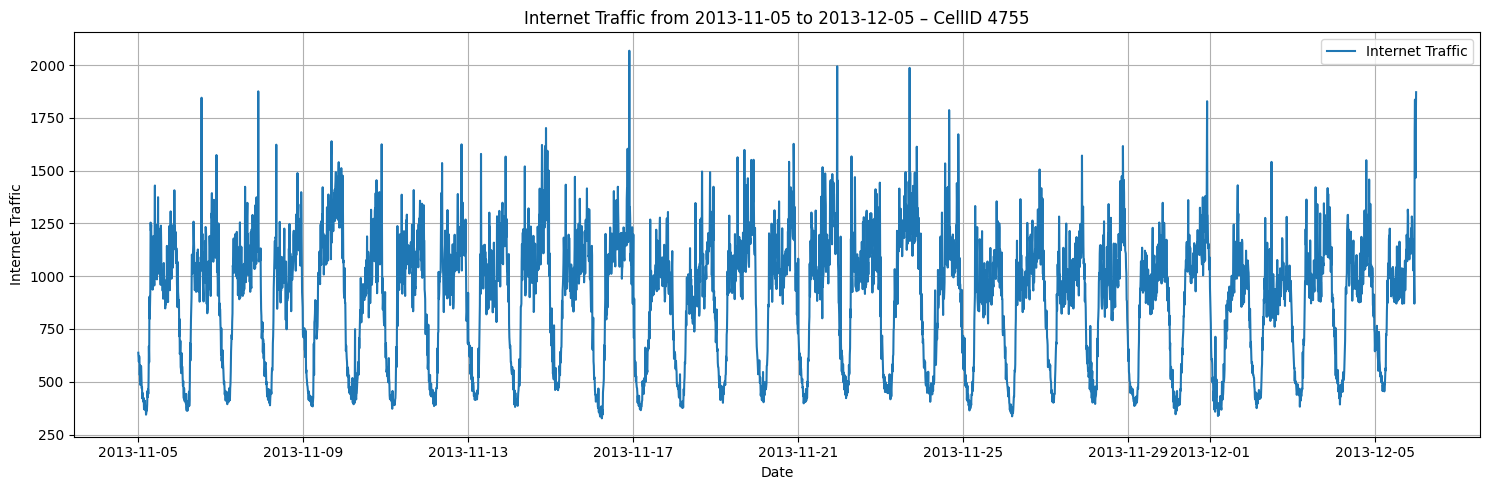

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(cell_4755_subset_Model.index, cell_4755_subset_Model['internet'], label='Internet Traffic')
plt.title('Internet Traffic from 2013-11-05 to 2013-12-05 – CellID 4755')
plt.xlabel('Date')
plt.ylabel('Internet Traffic')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Step 2: Generate harmonic regressors for seasonality & trend over whole dataset


In [ ]:
import numpy as np

def create_fourier_terms(index, period, order, prefix):
    t = np.arange(len(index))
    terms = {}
    for k in range(1, order + 1):
        terms[f'{prefix}_sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        terms[f'{prefix}_cos_{k}'] = np.cos(2 * np.pi * k * t / period)
    return pd.DataFrame(terms, index=index)

# Harmonics parameters
seasonal_period = 144  # daily seasonality in 10-min intervals
seasonal_order = 3

trend_period = len(cell_4755_subset_Model)  # whole length to capture slow trend cycles
trend_order = 2

# Generate regressors
seasonal_terms = create_fourier_terms(cell_4755_subset_Model.index, seasonal_period, seasonal_order, 'seasonal')
trend_terms = create_fourier_terms(cell_4755_subset_Model.index, trend_period, trend_order, 'trend')

harmonic_regressors = pd.concat([seasonal_terms, trend_terms], axis=1)
print(harmonic_regressors.head())


                     seasonal_sin_1  seasonal_cos_1  seasonal_sin_2  \
datetime                                                              
2013-11-05 00:00:00        0.000000        1.000000        0.000000   
2013-11-05 00:10:00        0.043619        0.999048        0.087156   
2013-11-05 00:20:00        0.087156        0.996195        0.173648   
2013-11-05 00:30:00        0.130526        0.991445        0.258819   
2013-11-05 00:40:00        0.173648        0.984808        0.342020   

                     seasonal_cos_2  seasonal_sin_3  seasonal_cos_3  \
datetime                                                              
2013-11-05 00:00:00        1.000000        0.000000        1.000000   
2013-11-05 00:10:00        0.996195        0.130526        0.991445   
2013-11-05 00:20:00        0.984808        0.258819        0.965926   
2013-11-05 00:30:00        0.965926        0.382683        0.923880   
2013-11-05 00:40:00        0.939693        0.500000        0.866025   

    

Step 3: Generate historical mean regressor


In [ ]:
rolling_window = seasonal_period  # 1 day

historical_mean = cell_4755_subset_Model['internet'].rolling(window=rolling_window, min_periods=1).mean()
historical_mean.name = 'historical_mean'

# Combine all regressors
exog = pd.concat([harmonic_regressors, historical_mean], axis=1)
print(exog.head())


                     seasonal_sin_1  seasonal_cos_1  seasonal_sin_2  \
datetime                                                              
2013-11-05 00:00:00        0.000000        1.000000        0.000000   
2013-11-05 00:10:00        0.043619        0.999048        0.087156   
2013-11-05 00:20:00        0.087156        0.996195        0.173648   
2013-11-05 00:30:00        0.130526        0.991445        0.258819   
2013-11-05 00:40:00        0.173648        0.984808        0.342020   

                     seasonal_cos_2  seasonal_sin_3  seasonal_cos_3  \
datetime                                                              
2013-11-05 00:00:00        1.000000        0.000000        1.000000   
2013-11-05 00:10:00        0.996195        0.130526        0.991445   
2013-11-05 00:20:00        0.984808        0.258819        0.965926   
2013-11-05 00:30:00        0.965926        0.382683        0.923880   
2013-11-05 00:40:00        0.939693        0.500000        0.866025   

    

Step 4: Train/test split (fixed split for initial modeling)


In [ ]:
'''test_size = 60  # 10 hours × 6 intervals/hour
train_end = len(cell_4755_subset_outlierless_Model) - test_size

train_y = cell_4755_subset_outlierless_Model.iloc[:train_end]['internet']
test_y = cell_4755_subset_outlierless_Model.iloc[train_end:]['internet']

train_exog = exog.iloc[:train_end]
test_exog = exog.iloc[train_end:]

print(f"Train size: {len(train_y)}, Test size: {len(test_y)}")
'''

test_size = 60
train_size = 432

train_y = cell_4755_subset_Model.iloc[:train_size]['internet']
test_y = cell_4755_subset_Model.iloc[train_size:train_size + test_size]['internet']

train_exog = exog.iloc[:train_size]
test_exog = exog.iloc[train_size:train_size + test_size]

print(f"Train size: {len(train_y)}, Test size: {len(test_y)}")
print(f"exog size: {len(train_exog)}, Test size: {len(test_exog)}")


Train size: 432, Test size: 60
exog size: 432, Test size: 60


Step 5: Stationarity check & differencing decision


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, label):
    result = adfuller(series.dropna())
    print(f'ADF Statistic ({label}): {result[0]}')
    print(f'p-value ({label}): {result[1]}')

print("Original:")
adf_test(train_y, 'Original')

print("Regular differencing:")
adf_test(train_y.diff().dropna(), 'Regular differencing')

print("Seasonal differencing:")
adf_test(train_y.diff(seasonal_period).dropna(), 'Seasonal differencing')

print("Regular + Seasonal differencing:")
adf_test(train_y.diff().diff(seasonal_period).dropna(), 'Regular + Seasonal differencing')


Original:
ADF Statistic (Original): -2.741675073891339
p-value (Original): 0.06710009844332142
Regular differencing:
ADF Statistic (Regular differencing): -16.347850056801825
p-value (Regular differencing): 2.952353725605737e-29
Seasonal differencing:
ADF Statistic (Seasonal differencing): -13.743447022226864
p-value (Seasonal differencing): 1.083553026677391e-25
Regular + Seasonal differencing:
ADF Statistic (Regular + Seasonal differencing): -8.061130501619475
p-value (Regular + Seasonal differencing): 1.6418809038723366e-12


Step 6: Fit initial SARIMAX model


In [ ]:
# STEP 1: Ensure the original index is preserved
#train_y = internet.iloc[:432]
#train_exog = exog.iloc[:432]

# STEP 2: (Optional) Set frequency to avoid warnings
train_y.index.freq = '10min'
train_exog.index.freq = '10min'


In [ ]:
print(train_y.index.freq)  # Should show: <10 * Minutes>
print(train_exog.shape)    # Should be (432, 11) — or however many regressors you have


<10 * Minutes>
(432, 11)


In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(
    train_y,
    order=(1,1,0),
    seasonal_order=(1,1,0,seasonal_period),
    exog=train_exog,
    enforce_stationarity=False,
    enforce_invertibility=False
)

initial_results = model.fit(disp=False)
print(initial_results.summary())


                                      SARIMAX Results                                      
Dep. Variable:                            internet   No. Observations:                  432
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 144)   Log Likelihood                -915.579
Date:                             Sat, 24 May 2025   AIC                           1859.158
Time:                                     11:42:54   BIC                           1900.539
Sample:                                 11-05-2013   HQIC                          1875.973
                                      - 11-07-2013                                         
Covariance Type:                               opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
seasonal_sin_1      0.0017   7.53e-07   2206.208      0.000       0.002       0.002
seasonal_cos

Step 7: Residual diagnostics & Ljung-Box test

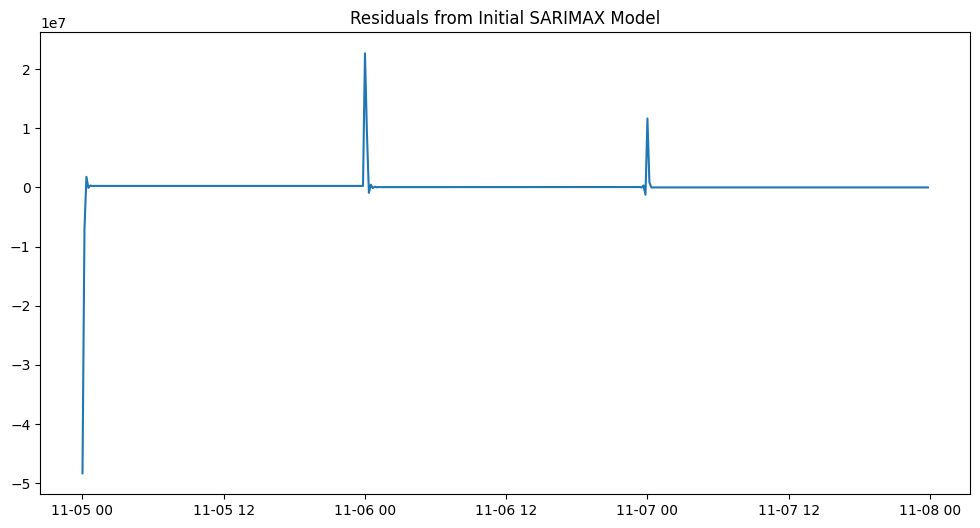

      lb_stat  lb_pvalue
10  12.972608   0.225207
20  12.973180   0.878532
30  12.974270   0.997097


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = initial_results.resid

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals from Initial SARIMAX Model')
plt.show()

lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print(lb_test)


This plot shows residuals over time, and it has:

Two major spikes (positive and negative) around 11-06 and 11-07.

Otherwise, the residuals are mostly close to 0.

🔍 Interpretation:
These spikes indicate outliers or model misspecification at certain timestamps.

Could be abnormal traffic, system issues, or holidays/events not modeled.

✅ Good news: No consistent pattern — so overall residuals look mostly uncorrelated (random noise), which is what we want in a well-fitted model.

The p-values are all > 0.05, especially at lags 20 and 30.

This means we fail to reject the null hypothesis that residuals are uncorrelated (i.e., they are "white noise").

✅ So your model is not leaving strong autocorrelations behind. This is a very good sign — the model captured the temporal structure well.

Step 8: Forecast next 60 steps (direct multi-step)

In [ ]:
forecast_obj = initial_results.get_forecast(steps=test_size, exog=test_exog)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()




In [ ]:
# Align forecast index with test_y
forecast.index = test_y.index
conf_int.index = test_y.index


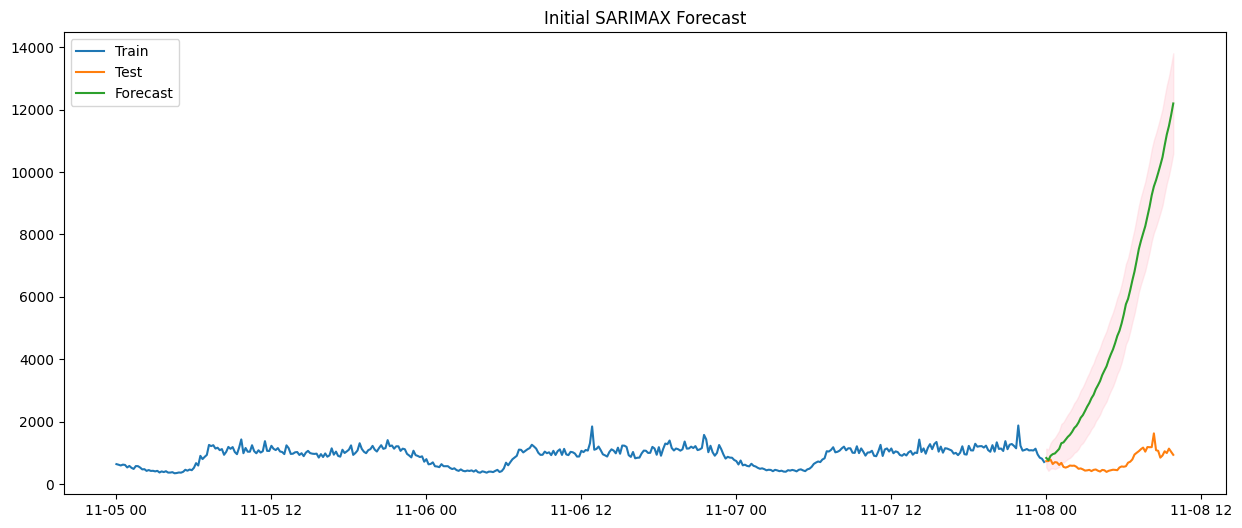

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train_y.index, train_y, label='Train')
plt.plot(test_y.index, test_y, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title('Initial SARIMAX Forecast')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test_y, forecast)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y, forecast))

# Calculate MAPE (handle division by zero)
mape = np.mean(np.abs((test_y - forecast) / test_y.replace(0, np.nan))) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 4289.7534
Root Mean Squared Error (RMSE): 5378.6279
Mean Absolute Percentage Error (MAPE): 574.96%


In [ ]:
# Replace zeros with a very small number to avoid division by zero
epsilon = 1e-10
mape = np.mean(np.abs((test_y - forecast) / (test_y.replace(0, epsilon)))) * 100

accuracy = 100 - mape  # Accuracy percentage

print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: -474.96%


In [ ]:
nrmse = rmse / test_y.mean()
print(f"Normalized RMSE: {nrmse:.4f}")


Normalized RMSE: 7.5250


In [ ]:
print((test_y == 0).sum())


0


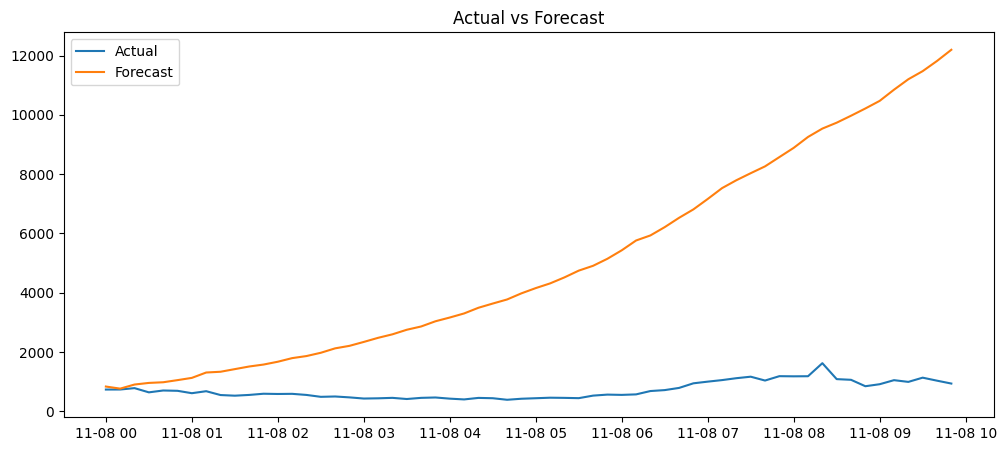

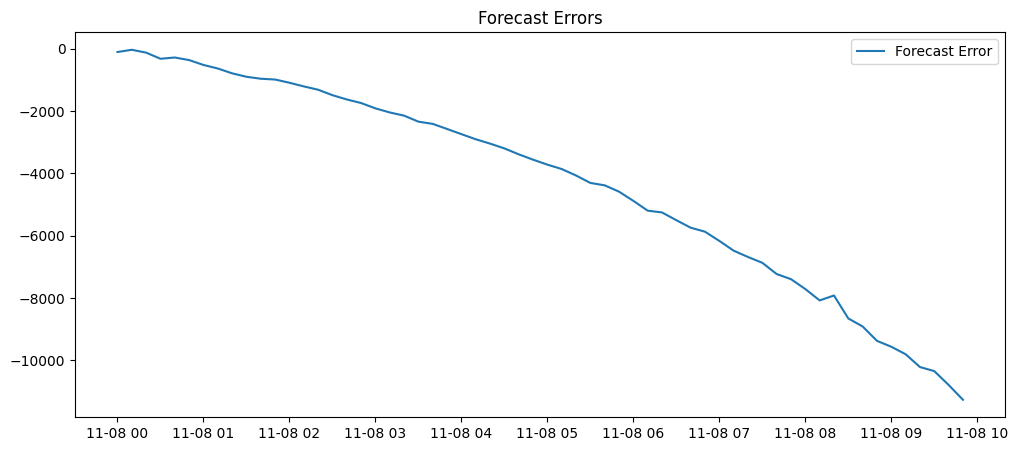

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_y.index, test_y, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.title('Actual vs Forecast')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(test_y.index, test_y - forecast, label='Forecast Error')
plt.legend()
plt.title('Forecast Errors')
plt.show()


Step 9: Automated grid search for fine-tuning (brief example)


In [ ]:
import itertools

p = [0,1,2]
d = [0,1]
q = [0,1]
P = [0,1]
D = [0,1]
Q = [0,1]
seasonal_period = 144

params = list(itertools.product(p,d,q,P,D,Q))

best_aic = float('inf')
best_param = None
best_seasonal_param = None
best_model = None

for param in params:
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_y,
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], seasonal_period),
            exog=train_exog,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_param = param[:3]
            best_seasonal_param = param[3:]
            best_model = results
    except:
        continue

print(f'Best SARIMA order: {best_param}, seasonal order: {best_seasonal_param}, AIC: {best_aic}')
print(best_model.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
